# FLIP (00): Data Science 
**(Module 01: Data Science)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---


# Session 4 Supervised Learning


The purpose of this session is to demonstrate different coefficient and linear regression.


## Content

### Part 1 Data Dependency

1.1 [Pearson's-r Correlation coefficient](#pearson)

1.2 [Spearman's rank coefficient](#spearman)


### Part 2 Linear Regression

2.1 [Multiple Linear Regression](#mlr)

2.2 [Regression for Median House Price](#rmhp)

### Part 3 Distances

3.1 [Euclidean Distance](#euclidean)

3.2 [Cosine Distance](#cosine)

3.3 [Term-by-Document Matrix](#t2d)

### Part 4 K-NN Classification

4.1 [K-NN in Python](#knn)

4.2 [Decision Boundary](#db)

### Part 5 Naive Bayes Classifier

5.1 [NBC by Example](#nbc)

5.2 [NBC Exercise](#nbc2)

### Part 6 Confidence Interval

6.1 [Population and Sample](#popsample)

6.2 [Confidence Interval](#ci)




---
## <span style="color:#0b486b">1. Data Dependency</span>

<a id = "pearson"></a>


### <span style="color:#0b486b">1.1 Pearson's-r Correlation coefficient</span>


We assume $X=\left\{ X_{1},\ldots,X_{n}\right\}$ 
and $Y=\left\{ Y_{1},\ldots,Y_{n}\right\}$. Then Pearson-r correlation coefficient is defined as 

$$ \rho(X,Y) = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} =  \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2} \sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}} $$

Use the car data and find the Pearson's-r correlation coefficient between car weights and fuel consumption.

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv('data\Auto.csv')

In [3]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


In [4]:
data.describe()

,miles,cylinder number,Engine displacement,Horse power,Weight
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.187500,230.721875,146.687500,3.217250
std,6.026948,1.785922,123.938694,68.562868,0.978457
min,10.400000,4.000000,71.100000,52.000000,1.513000
25%,15.425000,4.000000,120.825000,96.500000,2.581250
50%,19.200000,6.000000,196.300000,123.000000,3.325000
75%,22.800000,8.000000,326.000000,180.000000,3.610000
max,33.900000,8.000000,472.000000,335.000000,5.424000


In [5]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


In [6]:
miles = data['miles']
weights = data['Weight']

In [7]:
print (miles[:10])
print (weights[:10])

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
5    18.1
6    14.3
7    24.4
8    22.8
9    19.2
Name: miles, dtype: float64
0    2.620
1    2.875
2    2.320
3    3.215
4    3.440
5    3.460
6    3.570
7    3.190
8    3.150
9    3.440
Name: Weight, dtype: float64


In [8]:
pearson_r = np.cov(miles, weights)[0, 1] / (miles.std() * weights.std())
print (pearson_r)

-0.8676593765172279


In [9]:
np.corrcoef(miles,weights)

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

In [10]:
horse = data['Horse power']

In [11]:
np.corrcoef(weights,horse)

array([[1.        , 0.65874789],
       [0.65874789, 1.        ]])

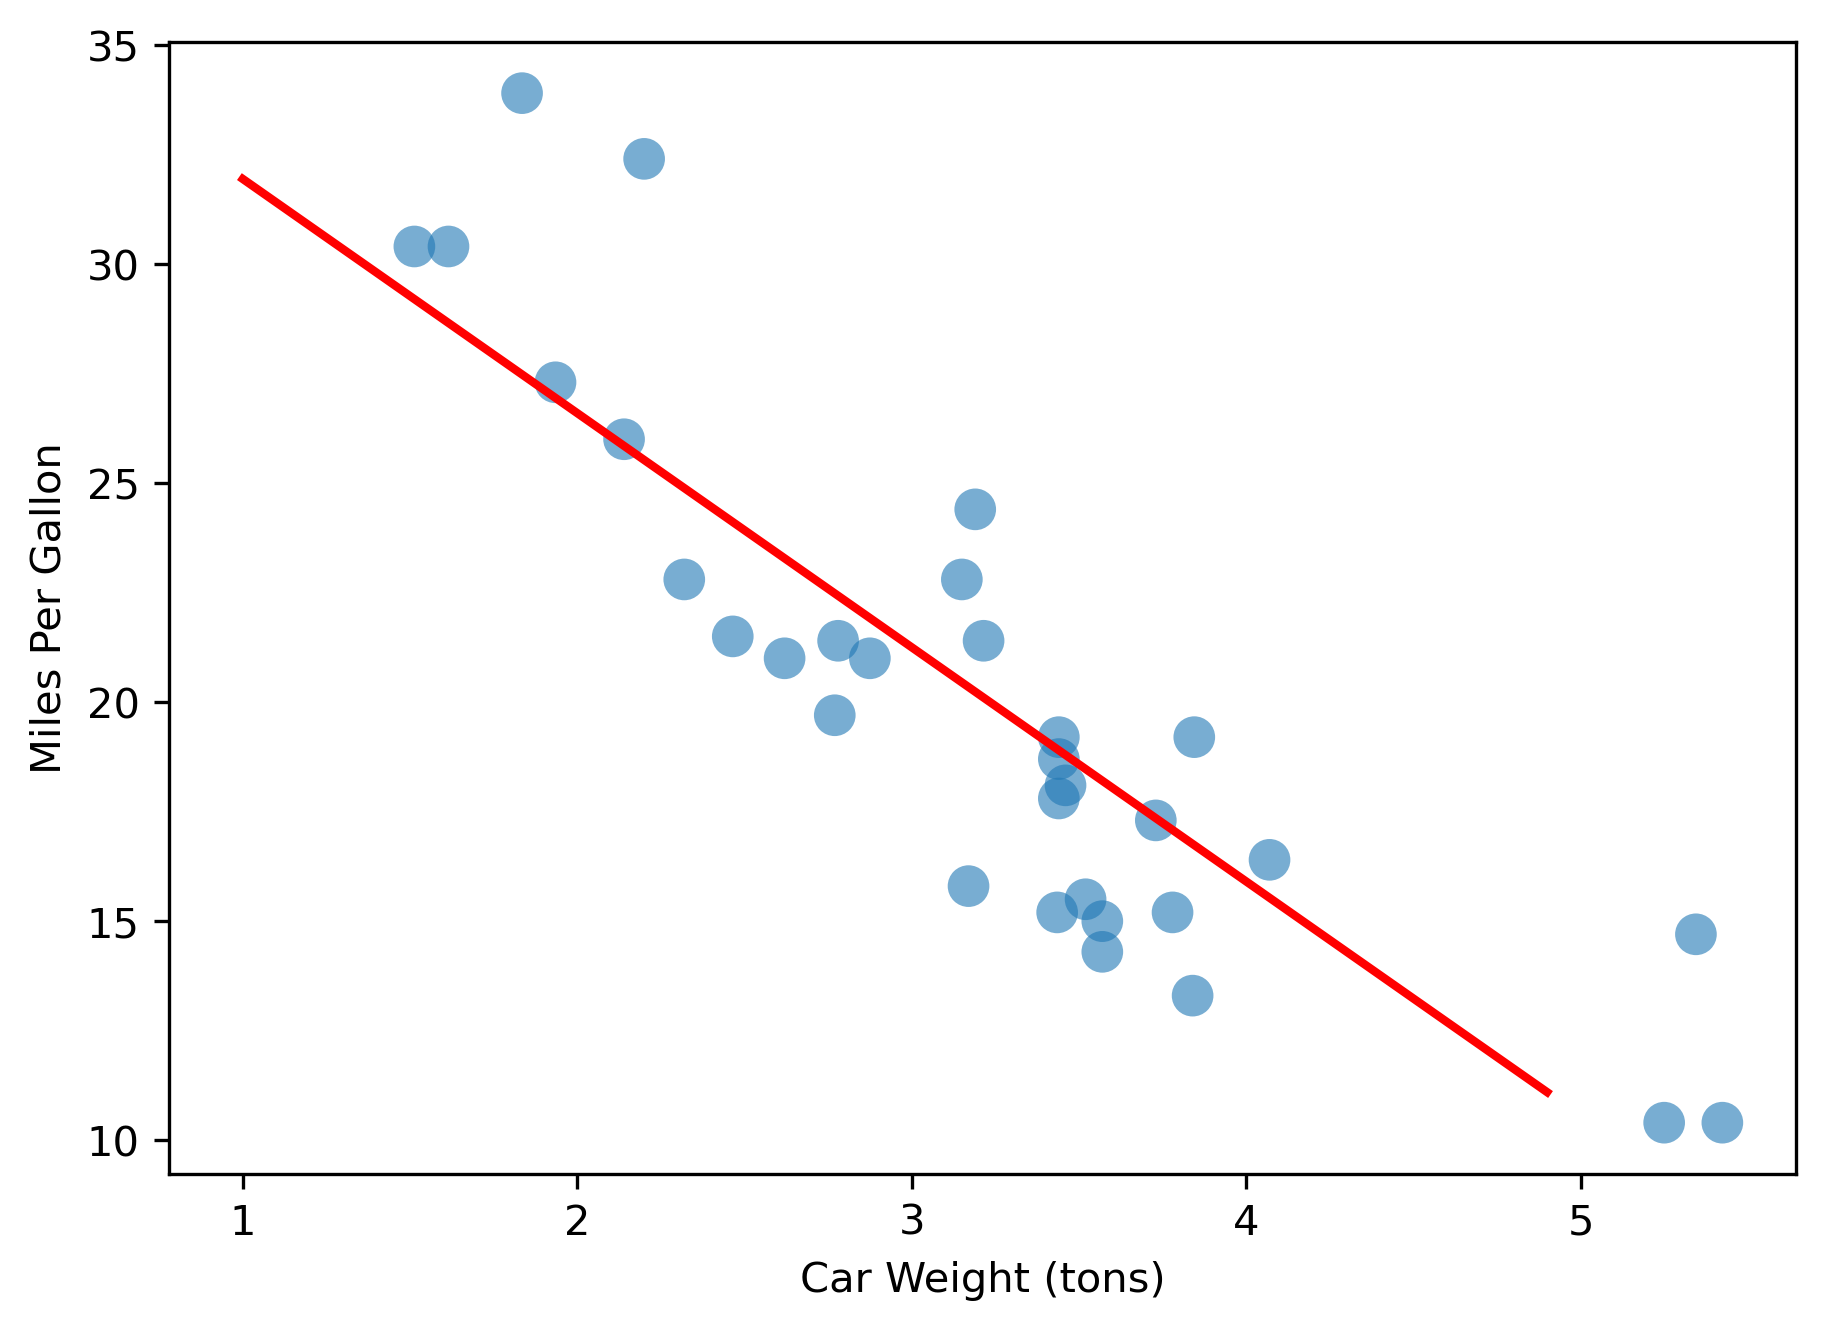

In [12]:
# plotting
fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
ax.scatter(weights,miles, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Car Weight (tons)')
ax.set_ylabel('Miles Per Gallon')

line_coef = np.polyfit(weights, miles, 1)
xx = np.arange(1, 5, 0.1)
yy = line_coef[0]*xx + line_coef[1]

ax.plot(xx, yy, 'r', lw=2)

**Exercise 1**: 

1. Find the Pearson's-r coefficient for two linearly dependent variables. Add some noise and see the effect of varying the noise. 
2. Simulate and visualize some data with positive linear correlation
3. Simulate and visualize some data with negative linear correlation. 

(0.9094796737334769, 3.898697822297223e-39)


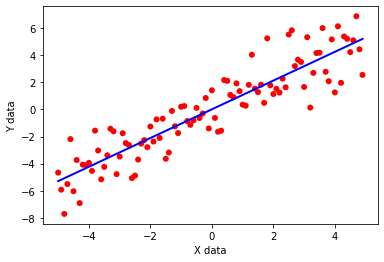

In [13]:
xx = np.arange(-5, 5, 0.1)
pp = 1.5  # level of noise
yy = xx + np.random.normal(0, pp, size=len(xx))

# visualize the data
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='none')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')

line_coef = np.polyfit(xx, yy, 1)
line_xx = np.arange(-5, 5, 0.1)
line_yy = line_coef[0]*line_xx + line_coef[1]

ax.plot(line_xx, line_yy, 'b', lw=2)

print (scipy.stats.pearsonr(xx, yy))

Pearson's r coefficient is limited to analyze the linear correlation between two variables. It is not capable to show the non-linear dependency. Investigate the Pearson's r coefficient between two variables that are correlated non-linearly.

Text(0.5, 1.0, '$Y = X^2+\\epsilon$')

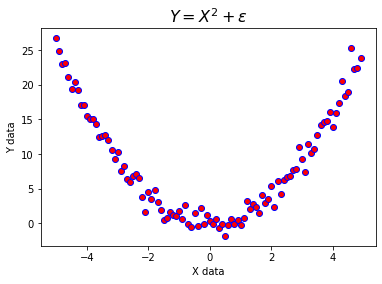

In [14]:
# generate some data, first for X
xx = np.arange(-5, 5, 0.1)

# assume Y = 2Y + some perturbation
pp = 1.1  # level of noise
yy = xx**2 + np.random.normal(0, pp, size=len(xx))

# visualize the data
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='b')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_title('$Y = X^2+\epsilon$', size=16)

Text(0.5, 1.0, '$Y = X^2+\\epsilon$')

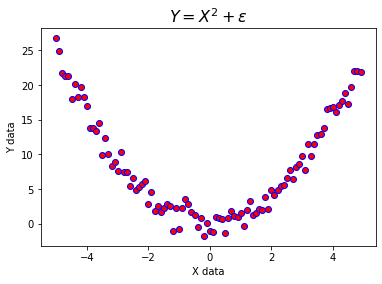

In [15]:
# generate some data, first for X
xx = np.arange(-5, 5, 0.1)

# assume Y = 2Y + some perturbation
pp = 1.1  # level of noise
yy = xx**2 + np.random.normal(0, pp, size=len(xx))

# visualize the data
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='b')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_title('$Y = X^2+\epsilon$', size=16)

The Pearson's-r correlation is near zero which means there is no linear correlation. But how about non-linear correlation? Isn't $y=x^2$?

In [16]:
np.corrcoef(xx,yy)

array([[ 1.        , -0.05166184],
       [-0.05166184,  1.        ]])

<a id = "spearman"></a>


### <span style="color:#0b486b">1.2 Spearman's rank coefficient</span>

Spearman's rank coefficient is used for discrete/ordinal data. Find the Spearman's rank between horse power and number of cylinders of the car data.

In [17]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


SpearmanrResult(correlation=0.9017909351708425, pvalue=1.8676856258444694e-12)


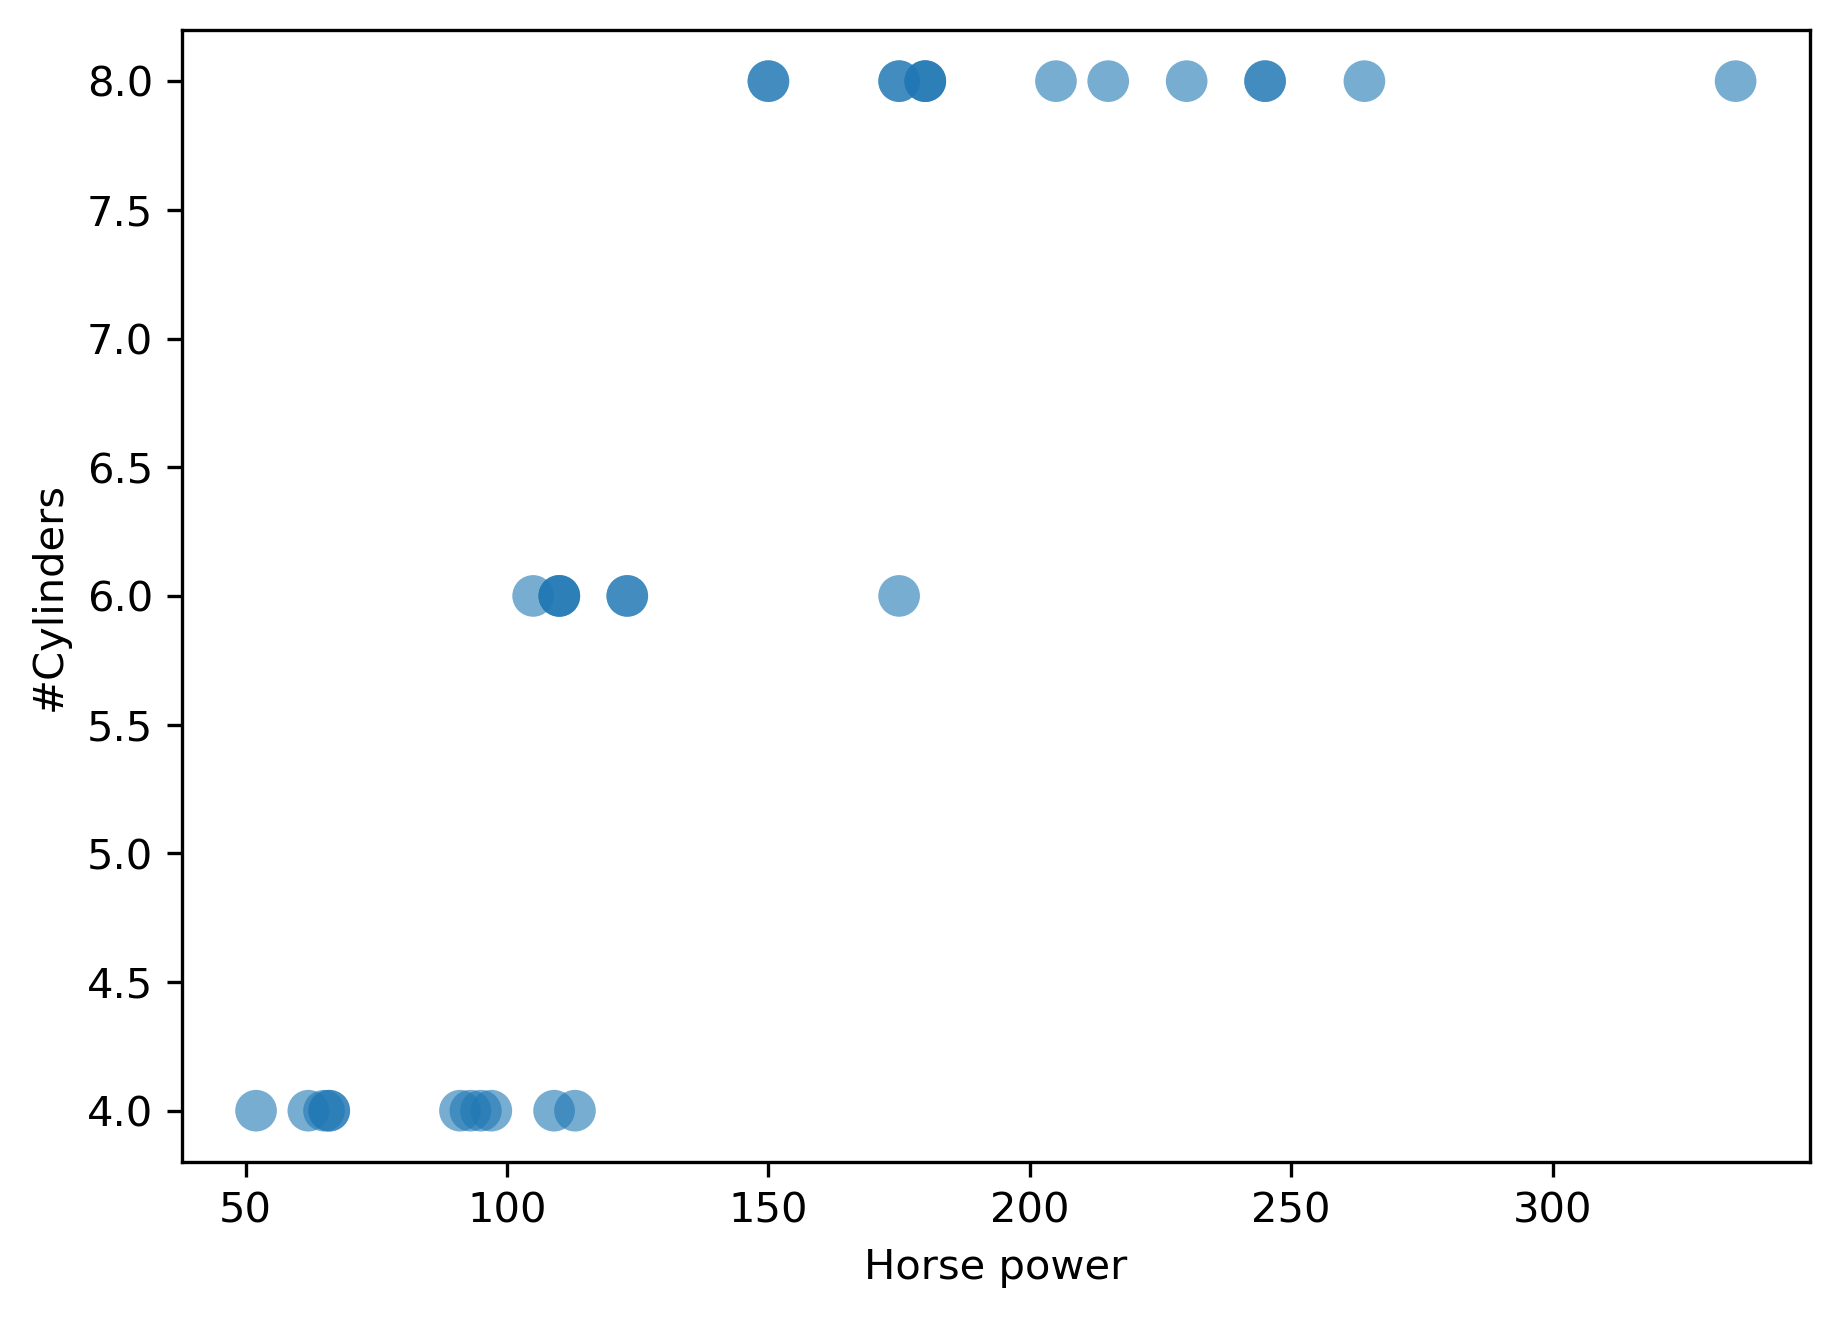

In [18]:
#horse = np.array([float(dd[4]) for dd in data[1:]])
#cylinder = np.array([float(dd[2]) for dd in data[1:]])
horse = data['Horse power']
cylinder = data['cylinder number']


fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
ax.scatter(horse, cylinder, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Horse power')
ax.set_ylabel('#Cylinders')

print (scipy.stats.spearmanr(horse, cylinder))

**Exercise 2**. 
Compute the spearman rank correlation between "Horse power" and "Engine displacement"

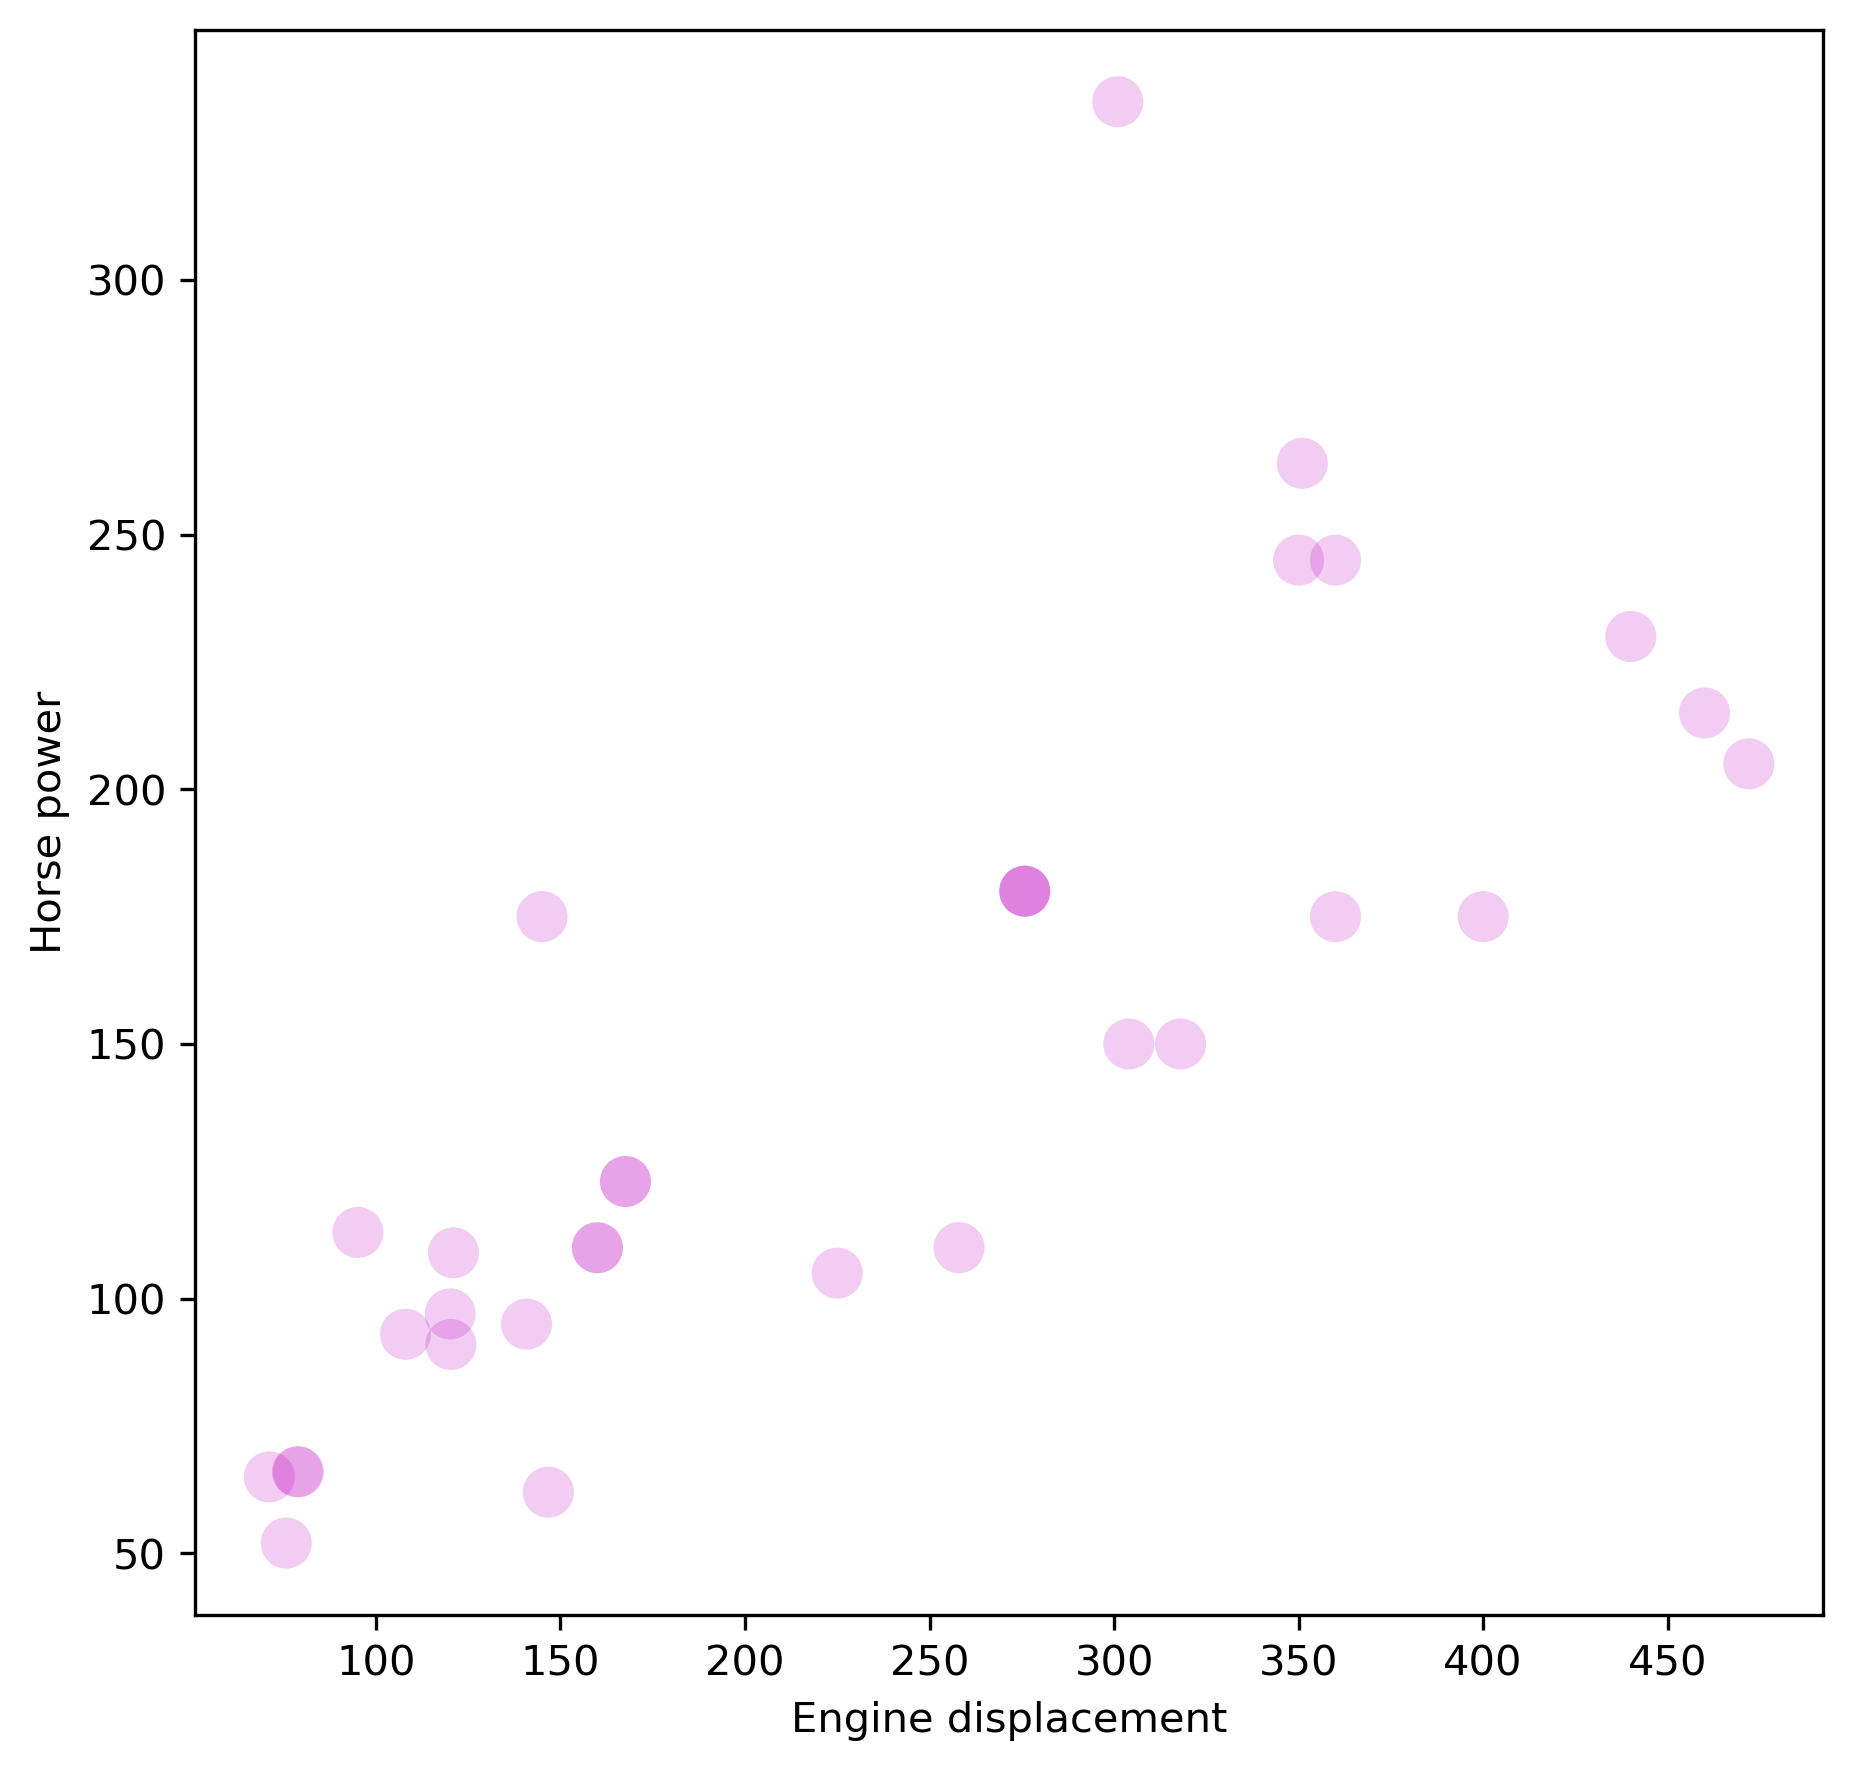

In [19]:
displacement = data['Engine displacement']
scipy.stats.spearmanr(horse,displacement)

radius = 150*np.ones(len(horse))
fig, ax = plt.subplots(figsize=(7,7),dpi=300)
ax.scatter(displacement, horse, alpha=0.2, c='m', edgecolor='none',s=radius)

ax.set_xlabel('Engine displacement')
ax.set_ylabel('Horse power')
plt.savefig("Engine_vs_horse.pdf")

---
## <span style="color:#0b486b">2. Linear Regression</span>


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

First we investigate a simple case by fitting a linear regression for three data points. First we simulate the data:

In [72]:
# simulating the data

x = np.c_[0, 1, 2, 1.5].T
y  = [1, 1.5, 3.1, 1.5]

print (x)
print (y)

[[0. ]
 [1. ]
 [2. ]
 [1.5]]
[1, 1.5, 3.1, 1.5]


Text(0, 0.5, 'y')

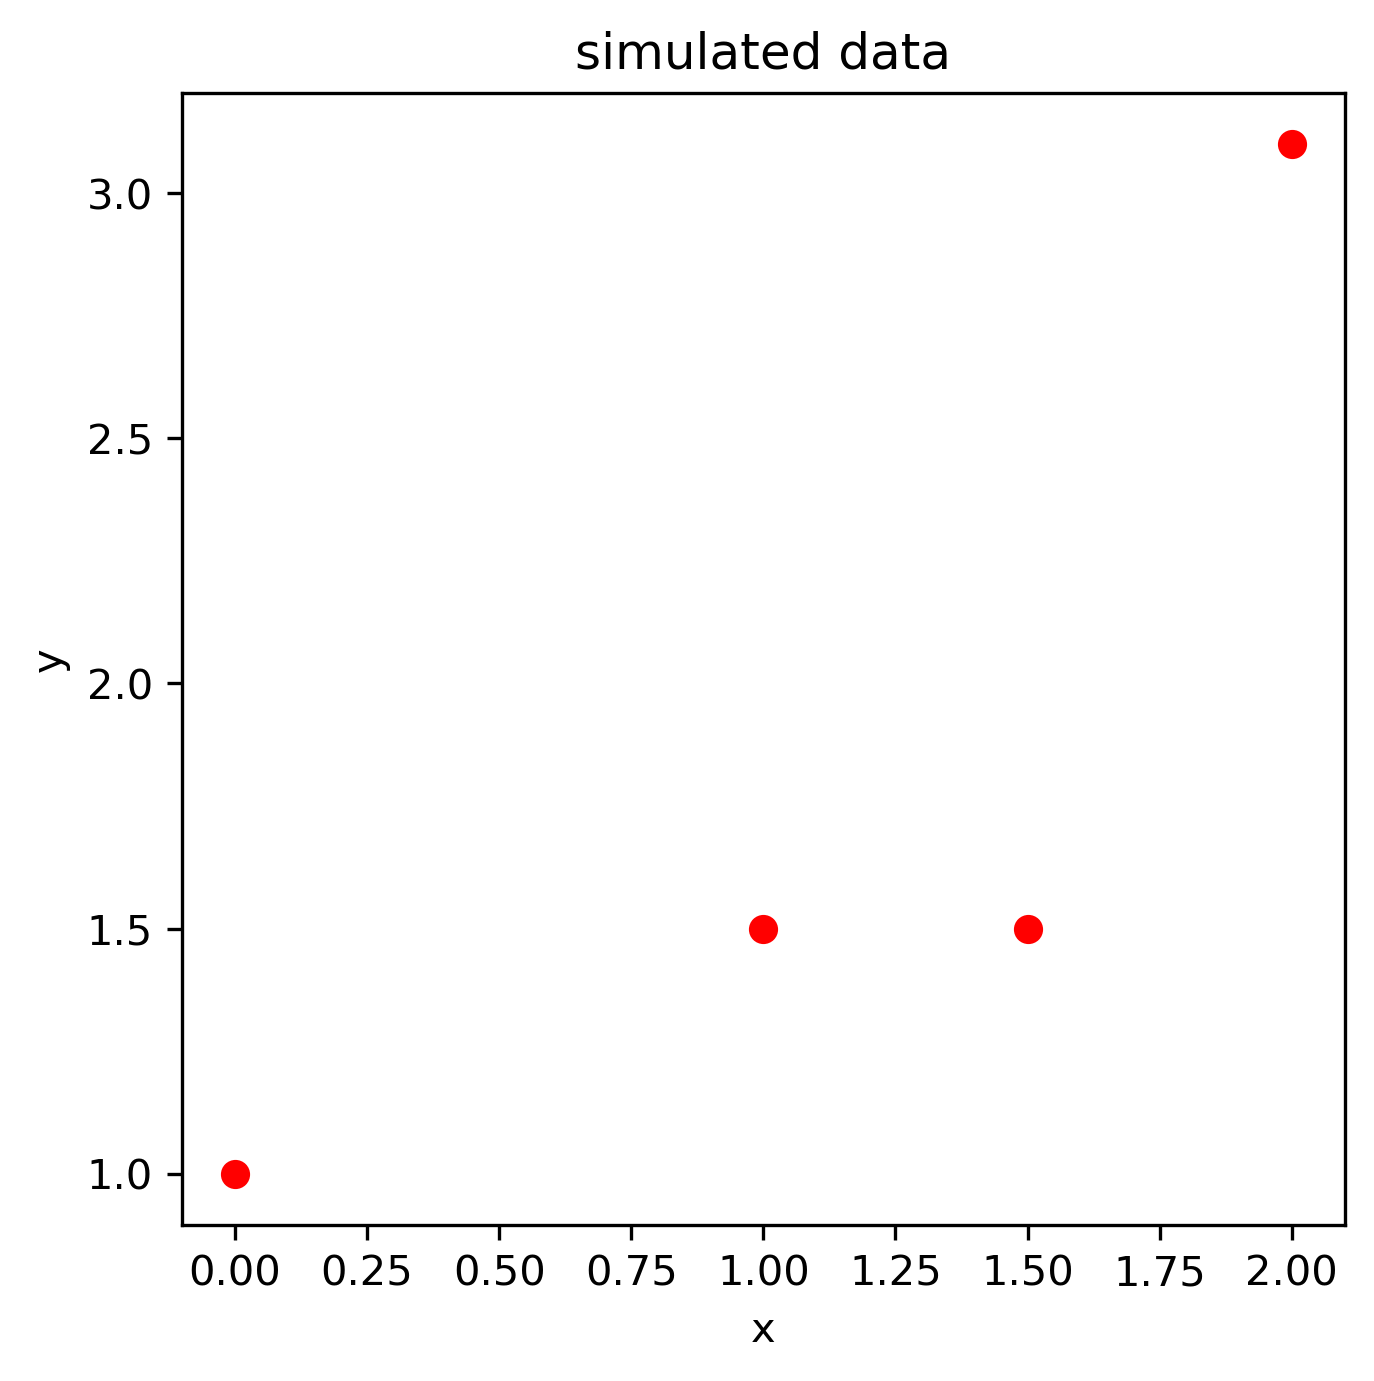

In [73]:
#plotting the data

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.scatter(x, y, c='r')
ax.set_title('simulated data')
ax.set_xlabel('x')
ax.set_ylabel('y')

Now we fit the linear regression:

In [79]:
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression 

# instanciate the model
lr = sklearn.linear_model.LinearRegression()

# fit the model
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
print ("Coefficients:", lr.coef_)
print ("   Intercept:", lr.intercept_)
print ("    Residues:", lr.residues_)

Coefficients: [0.89714286]
   Intercept: 0.7657142857142858


AttributeError: 'LinearRegression' object has no attribute 'residues_'

Let's plot the line to see how it estimates our data:

Text(0, 0.5, 'y')

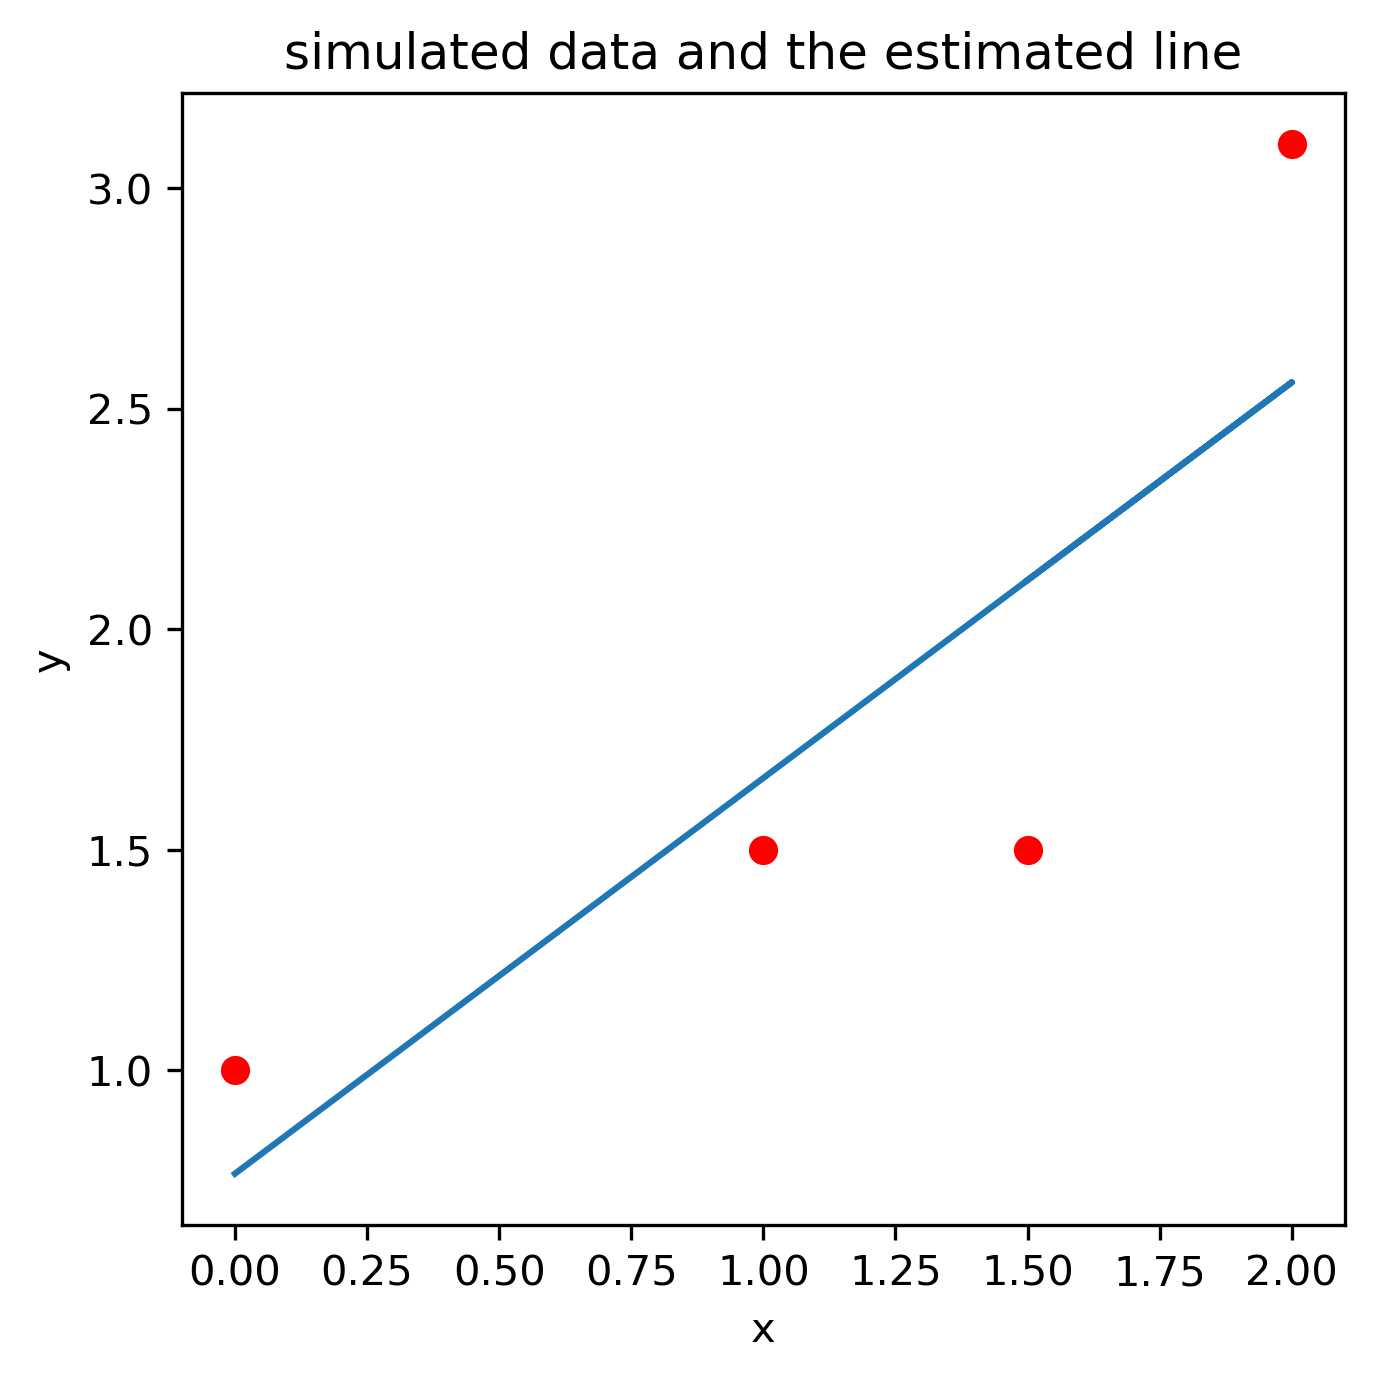

In [54]:
yhat = lr.predict(x)

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.scatter(x, y, c='r')
ax.plot(x, yhat)

ax.set_title('simulated data and the estimated line')
ax.set_xlabel('x')
ax.set_ylabel('y')

We can use the method `predict()` to predict `y` for a new `x`

In [94]:
x_test = np.c_[4, 2.3].T
y_test = lr.predict(x_test)

print (x_test.T)
print (y_test)

[[4.  2.3]]
[4.35428571 2.82914286]


<a id = "mlr"></a>


### <span style="color:#0b486b">2.1 Multiple Linear Regression</span>


Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. For example if we have two explanatory variables (attributes, features), our data has such a form:

$$
D=\left\{ \left(\left(x_{1,1},x_{2,1}\right),y_{1}\right),\left(\left(x_{1,2},x_{2,2}\right),y_{2}\right),\ldots,\left(\left(x_{1,n},x_{2,n}\right),y_{n}\right)\right\} 
$$

Now we fit a multiple linear regression $y = x_1 + 2x_2 + 1$


In [95]:
# simulate the data

x = np.c_[[0, 0], [0, 1], [1, 1], [1, 0]].T
y = [1.5, 3.2, 4, 2]

print (x)
print (y)

[[0 0]
 [0 1]
 [1 1]
 [1 0]]
[1.5, 3.2, 4, 2]


In [96]:
mlr = linear_model.LinearRegression(fit_intercept=True)
mlr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
print (mlr.coef_)
print (mlr.intercept_)

[0.65 1.85]
1.4250000000000003


In [98]:
print (mlr.residues_)

AttributeError: 'LinearRegression' object has no attribute 'residues_'

In [99]:
print (mlr.predict(x))

[1.425 3.275 3.925 2.075]


**Exercises 3**: 

As the score suggests, now we have the perfect regression. Change the values of $y$ slightly and see what effect it has on the `mlr`.

<a id = "rmhp"></a>


### <span style="color:#0b486b">2.2 Regression for median house prices</span>


We are going to use the package `pandas` for reading and storing the data.

In [100]:
data = pd.read_csv('data/housing_300.csv')

In [101]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [102]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.435446,15.386667,8.873600,0.09000,0.514333,6.420333,62.796667,4.279012,4.486667,312.043333,17.588333,378.708600,10.704167,25.484667
std,0.670445,25.968217,6.378924,0.28666,0.108867,0.706043,29.141200,1.980475,1.618194,69.105717,2.286012,43.328929,6.208806,8.887553
min,0.006320,0.000000,0.460000,0.00000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.068810,0.000000,4.050000,0.00000,0.437000,5.934500,36.600000,2.597450,4.000000,264.000000,15.600000,381.075000,5.907500,19.575000
50%,0.139950,0.000000,6.660000,0.00000,0.489000,6.249500,66.800000,3.945400,4.000000,307.000000,17.800000,392.215000,9.530000,23.100000
75%,0.522168,21.250000,10.590000,0.00000,0.547000,6.781250,91.350000,5.720900,5.000000,384.000000,19.100000,395.622500,14.112500,29.650000
max,4.097400,100.000000,25.650000,1.00000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


Plot the scatter plot of the number of rooms vs the median house prices.

Text(0, 0.5, '$Y$ (median house prices)')

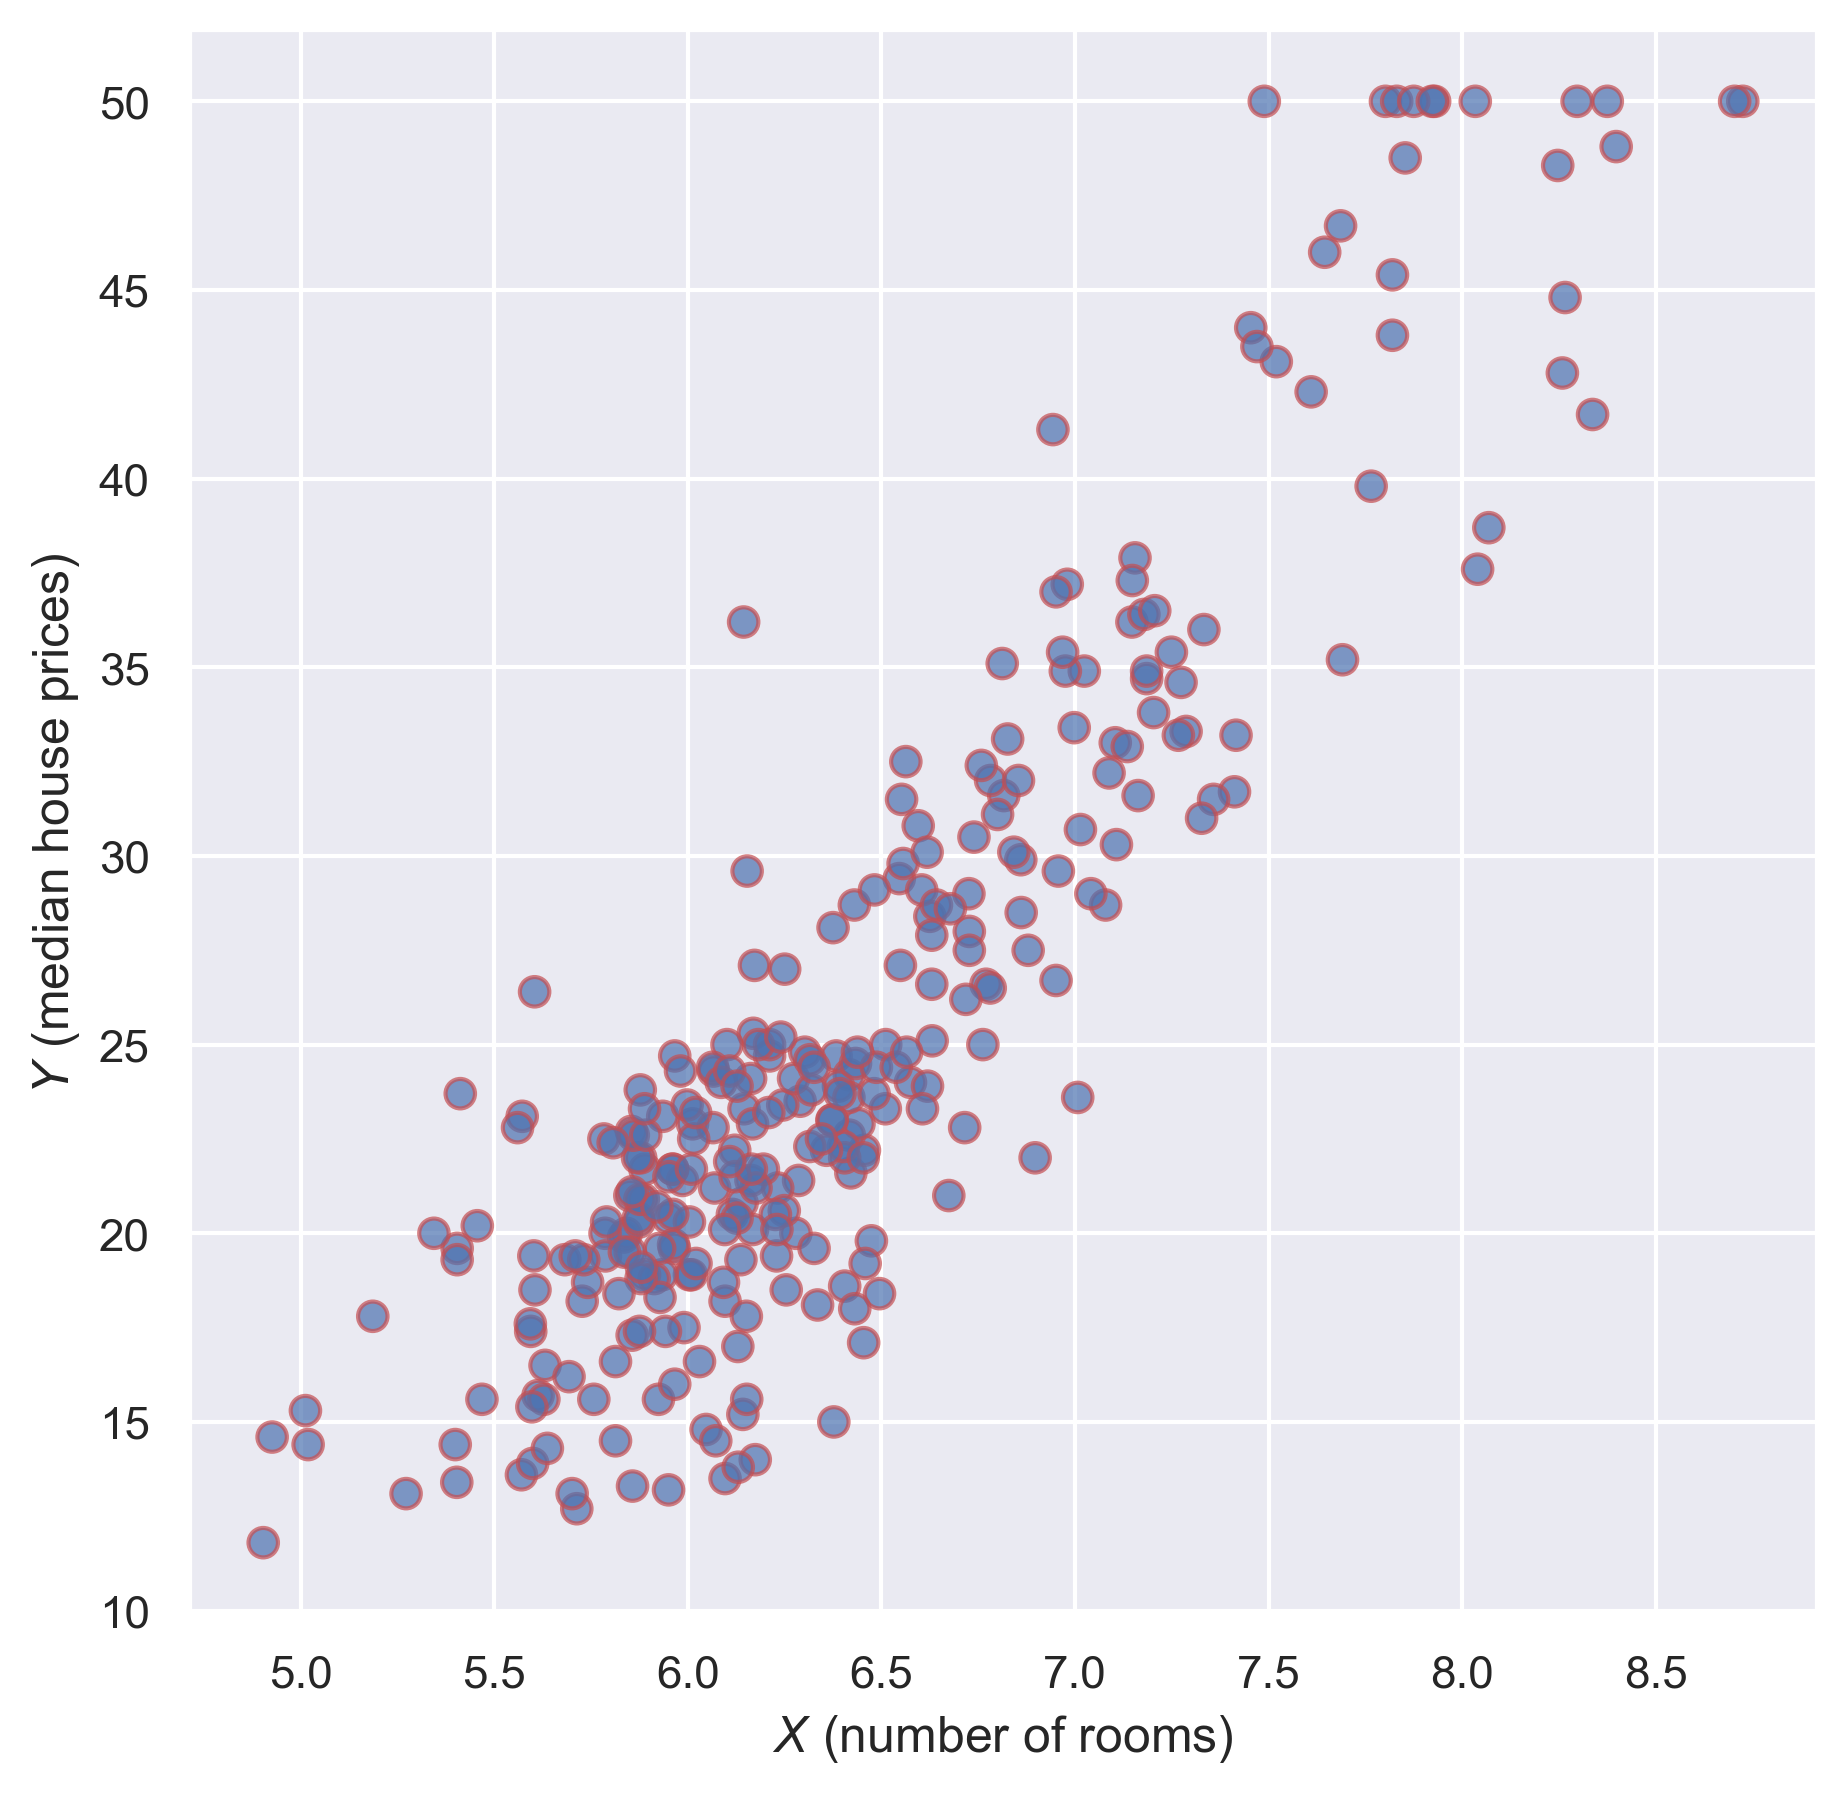

In [103]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=300)
median_prices = data['MEDV']
avg_rooms = data['RM']
scales = 50*np.ones(len(median_prices))
ax.scatter(avg_rooms, median_prices, color='b',s=scales, alpha=0.7, edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')

In [104]:
print (avg_rooms.shape)
print (median_prices.shape)

(300,)
(300,)


How correlated are the number of rooms and the price of the house?

In [105]:
np.corrcoef(avg_rooms, median_prices)

array([[1.        , 0.89804265],
       [0.89804265, 1.        ]])

Now we want to fit a linear regression mode on the data.

In [106]:
# prepare the data

x = np.c_[avg_rooms.values]
y = median_prices.tolist()

In [108]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [109]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
print (lr.coef_)
print (lr.intercept_)
print (lr.residues_)

[11.30440747]
-47.09339739688136


AttributeError: 'LinearRegression' object has no attribute 'residues_'

In [111]:
# obtain the model parameters

print (lr.coef_, lr.intercept_)

[11.30440747] -47.09339739688136


In [112]:
# predict 

yhat = lr.predict(x)
print (x[:10])
print (yhat[:10])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]]
[27.23308169 25.49220294 34.12877024 32.01484605 33.69920276 25.59394261
 20.86870028 22.67740548 16.56172104 20.77826503]


NameError: name 'xrange' is not defined

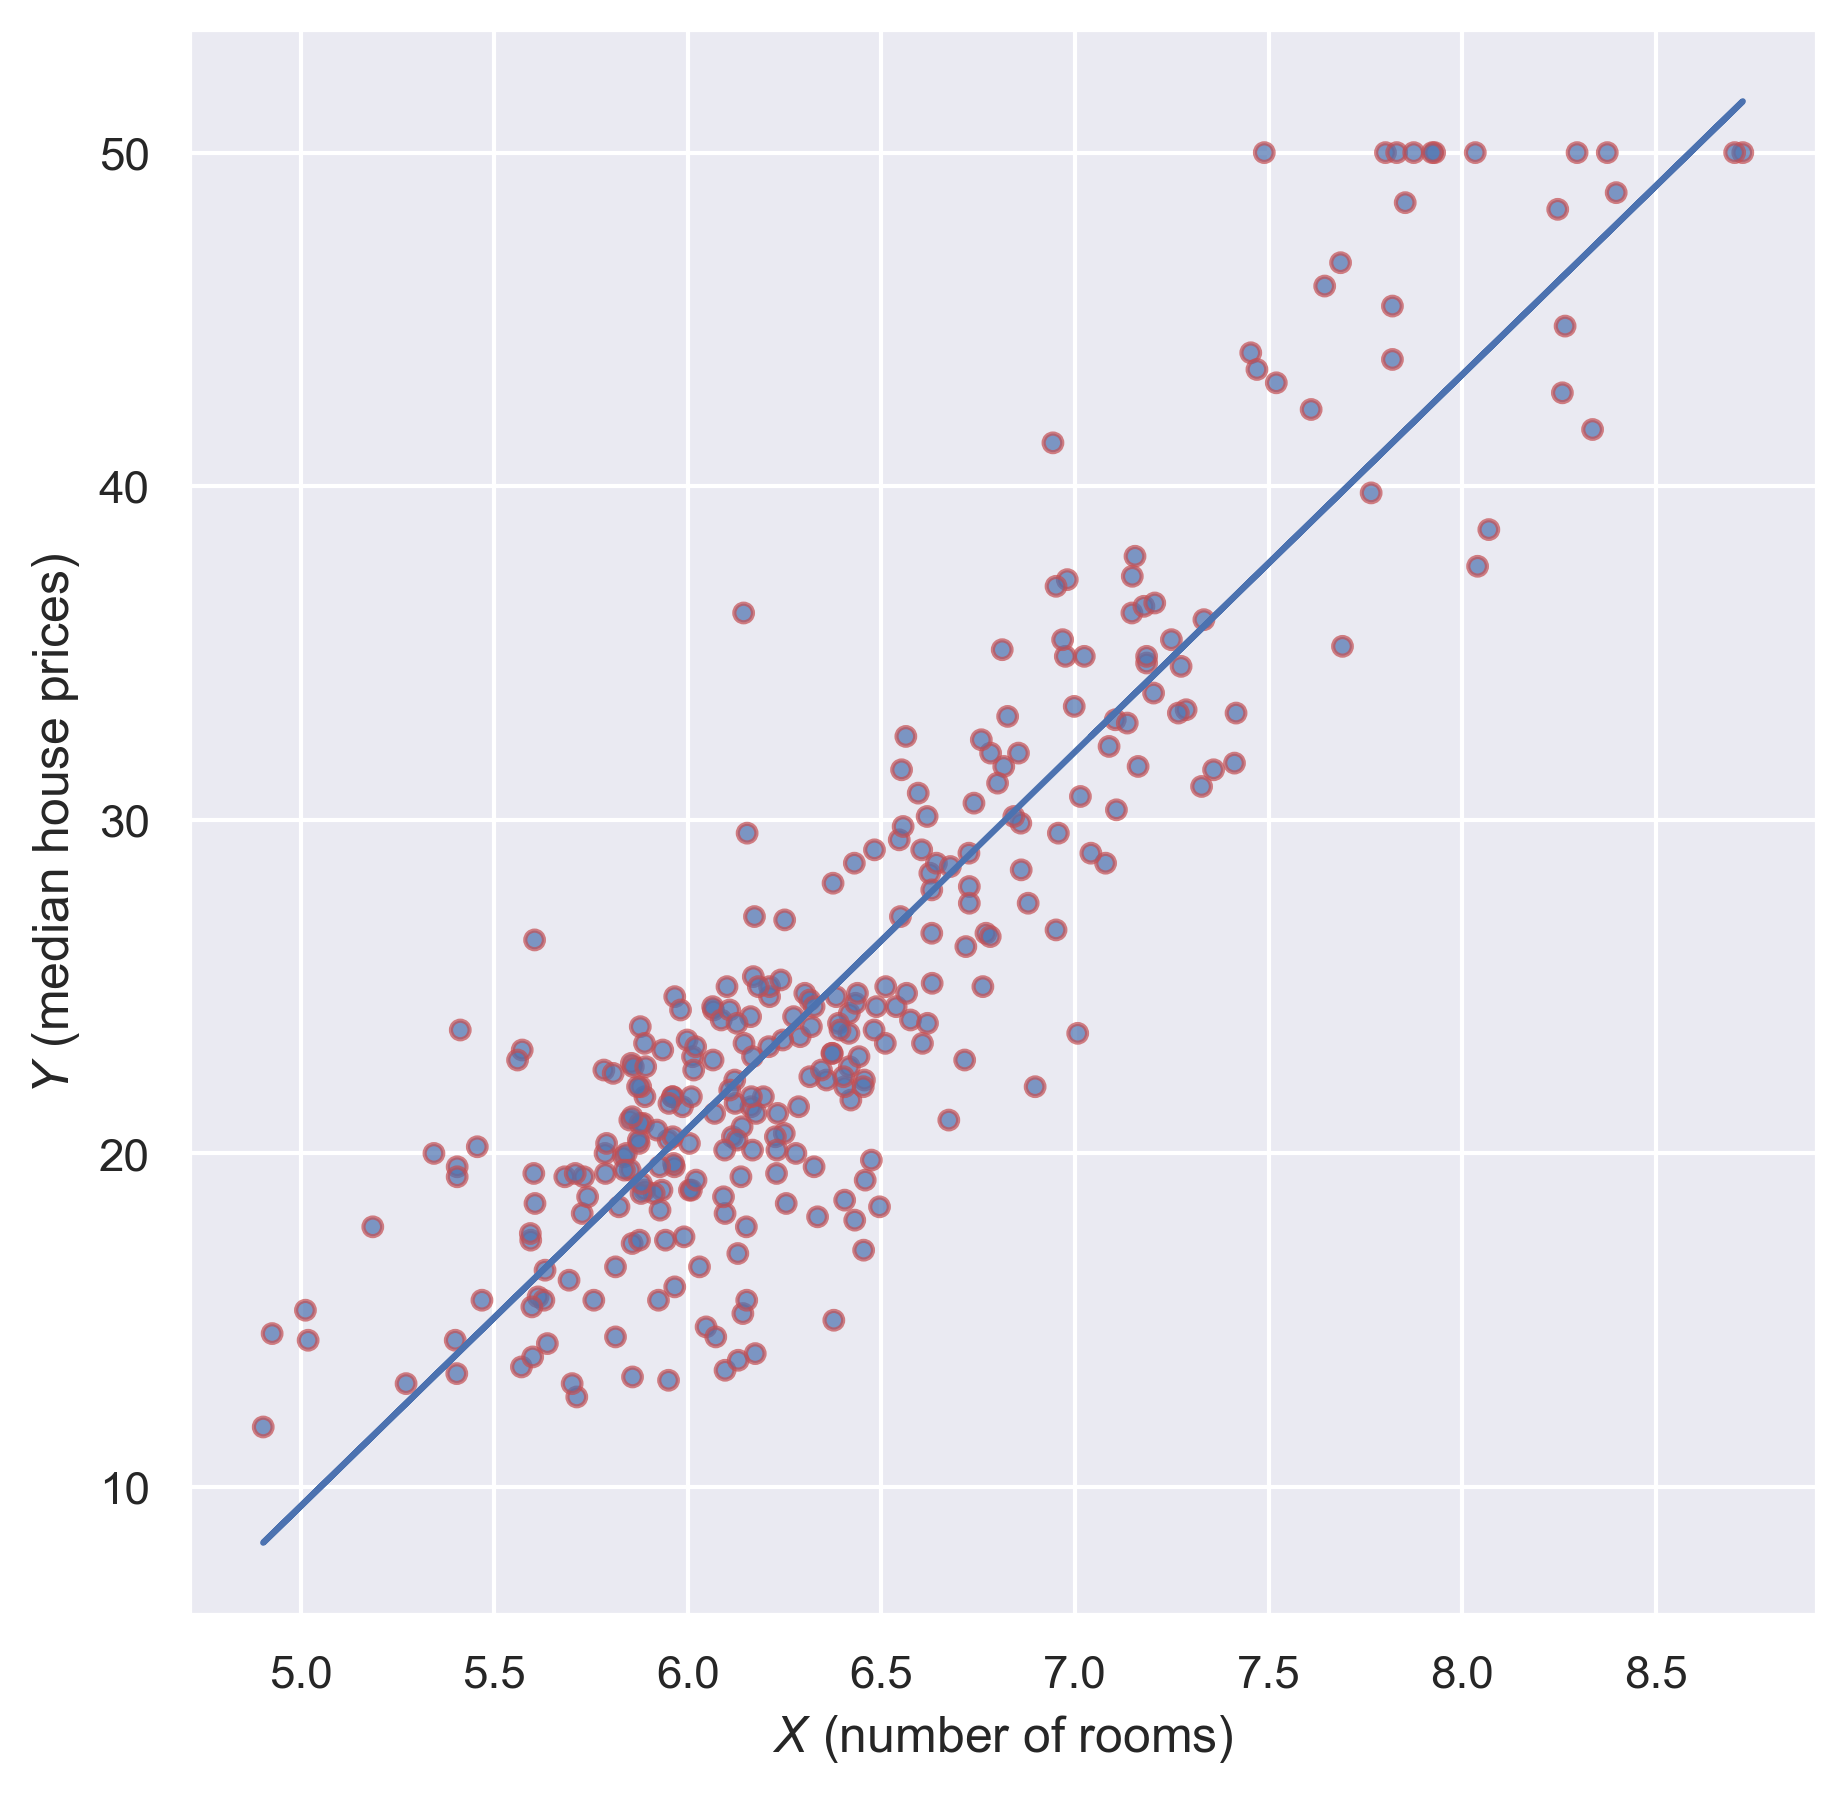

In [113]:
#plot the result

fig,ax = plt.subplots(figsize=(7,7),dpi=300)

scales = 20*np.ones(len(median_prices))
ax.scatter(avg_rooms,median_prices,color='b',s=scales,alpha=0.7,edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')

# plot the regression linear leared
ax.plot(x,yhat)

# visualize the residuals
tmp = np.reshape(x,[1,len(x)])[0]
tmp_x = []
tmp_y = []
for i in xrange(len(x)):
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,y[i])
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,yhat[i])
    ax.plot(tmp_x,tmp_y,color='g',linewidth=0.5)
    tmp_x = []
    tmp_y = []

check out the sum of residual:

In [115]:
lr.residues_

AttributeError: 'LinearRegression' object has no attribute 'residues_'

It is customary to test your model on **unseen** data. So we divide our data into two parts. We use 70% of it to train the model and 30% to evaluate its performance on unseen data.

In [116]:
split = 0.7
split_idx = int(np.round(split * len(data)))
split_idx

210

In [117]:
train_data = data[0:200]
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


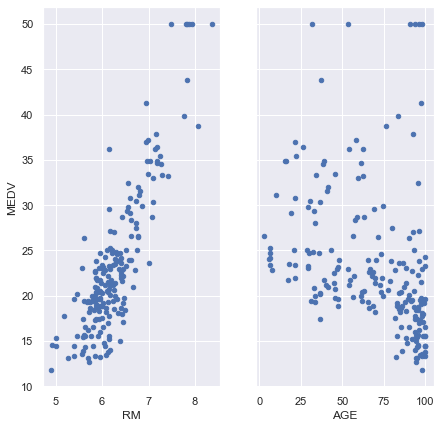

In [118]:
fig, axs = plt.subplots(1, 2, sharey=True)
train_data.plot(kind='scatter', x='RM', y='MEDV', ax=axs[0], figsize=(7, 7))
train_data.plot(kind='scatter', x='AGE', y='MEDV', ax=axs[1], figsize=(7, 7))

In [124]:
test_data = data[200:300]
test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
201,0.03445,82.5,2.03,0,0.4150,6.162,38.4,6.2700,2,348,14.7,393.77,7.43,24.1
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [125]:
train_X = train_data['RM'].values
train_X = np.c_[train_X]
train_Y = train_data['MEDV'].tolist()

test_X = test_data['RM'].values
test_X = np.c_[test_X]
test_Y = test_data['MEDV'].tolist()

In [126]:
print (type(train_X))
print (train_X.shape)
print (type(train_Y))

<class 'numpy.ndarray'>
(200, 1)
<class 'list'>


In [127]:
'''
Build a linear regression model from training data
'''
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
print (lr.coef_)
print (lr.intercept_)

[11.48585853]
-48.553067034025624


Now we plot the linear regression result and the data to see how it fits the training data:

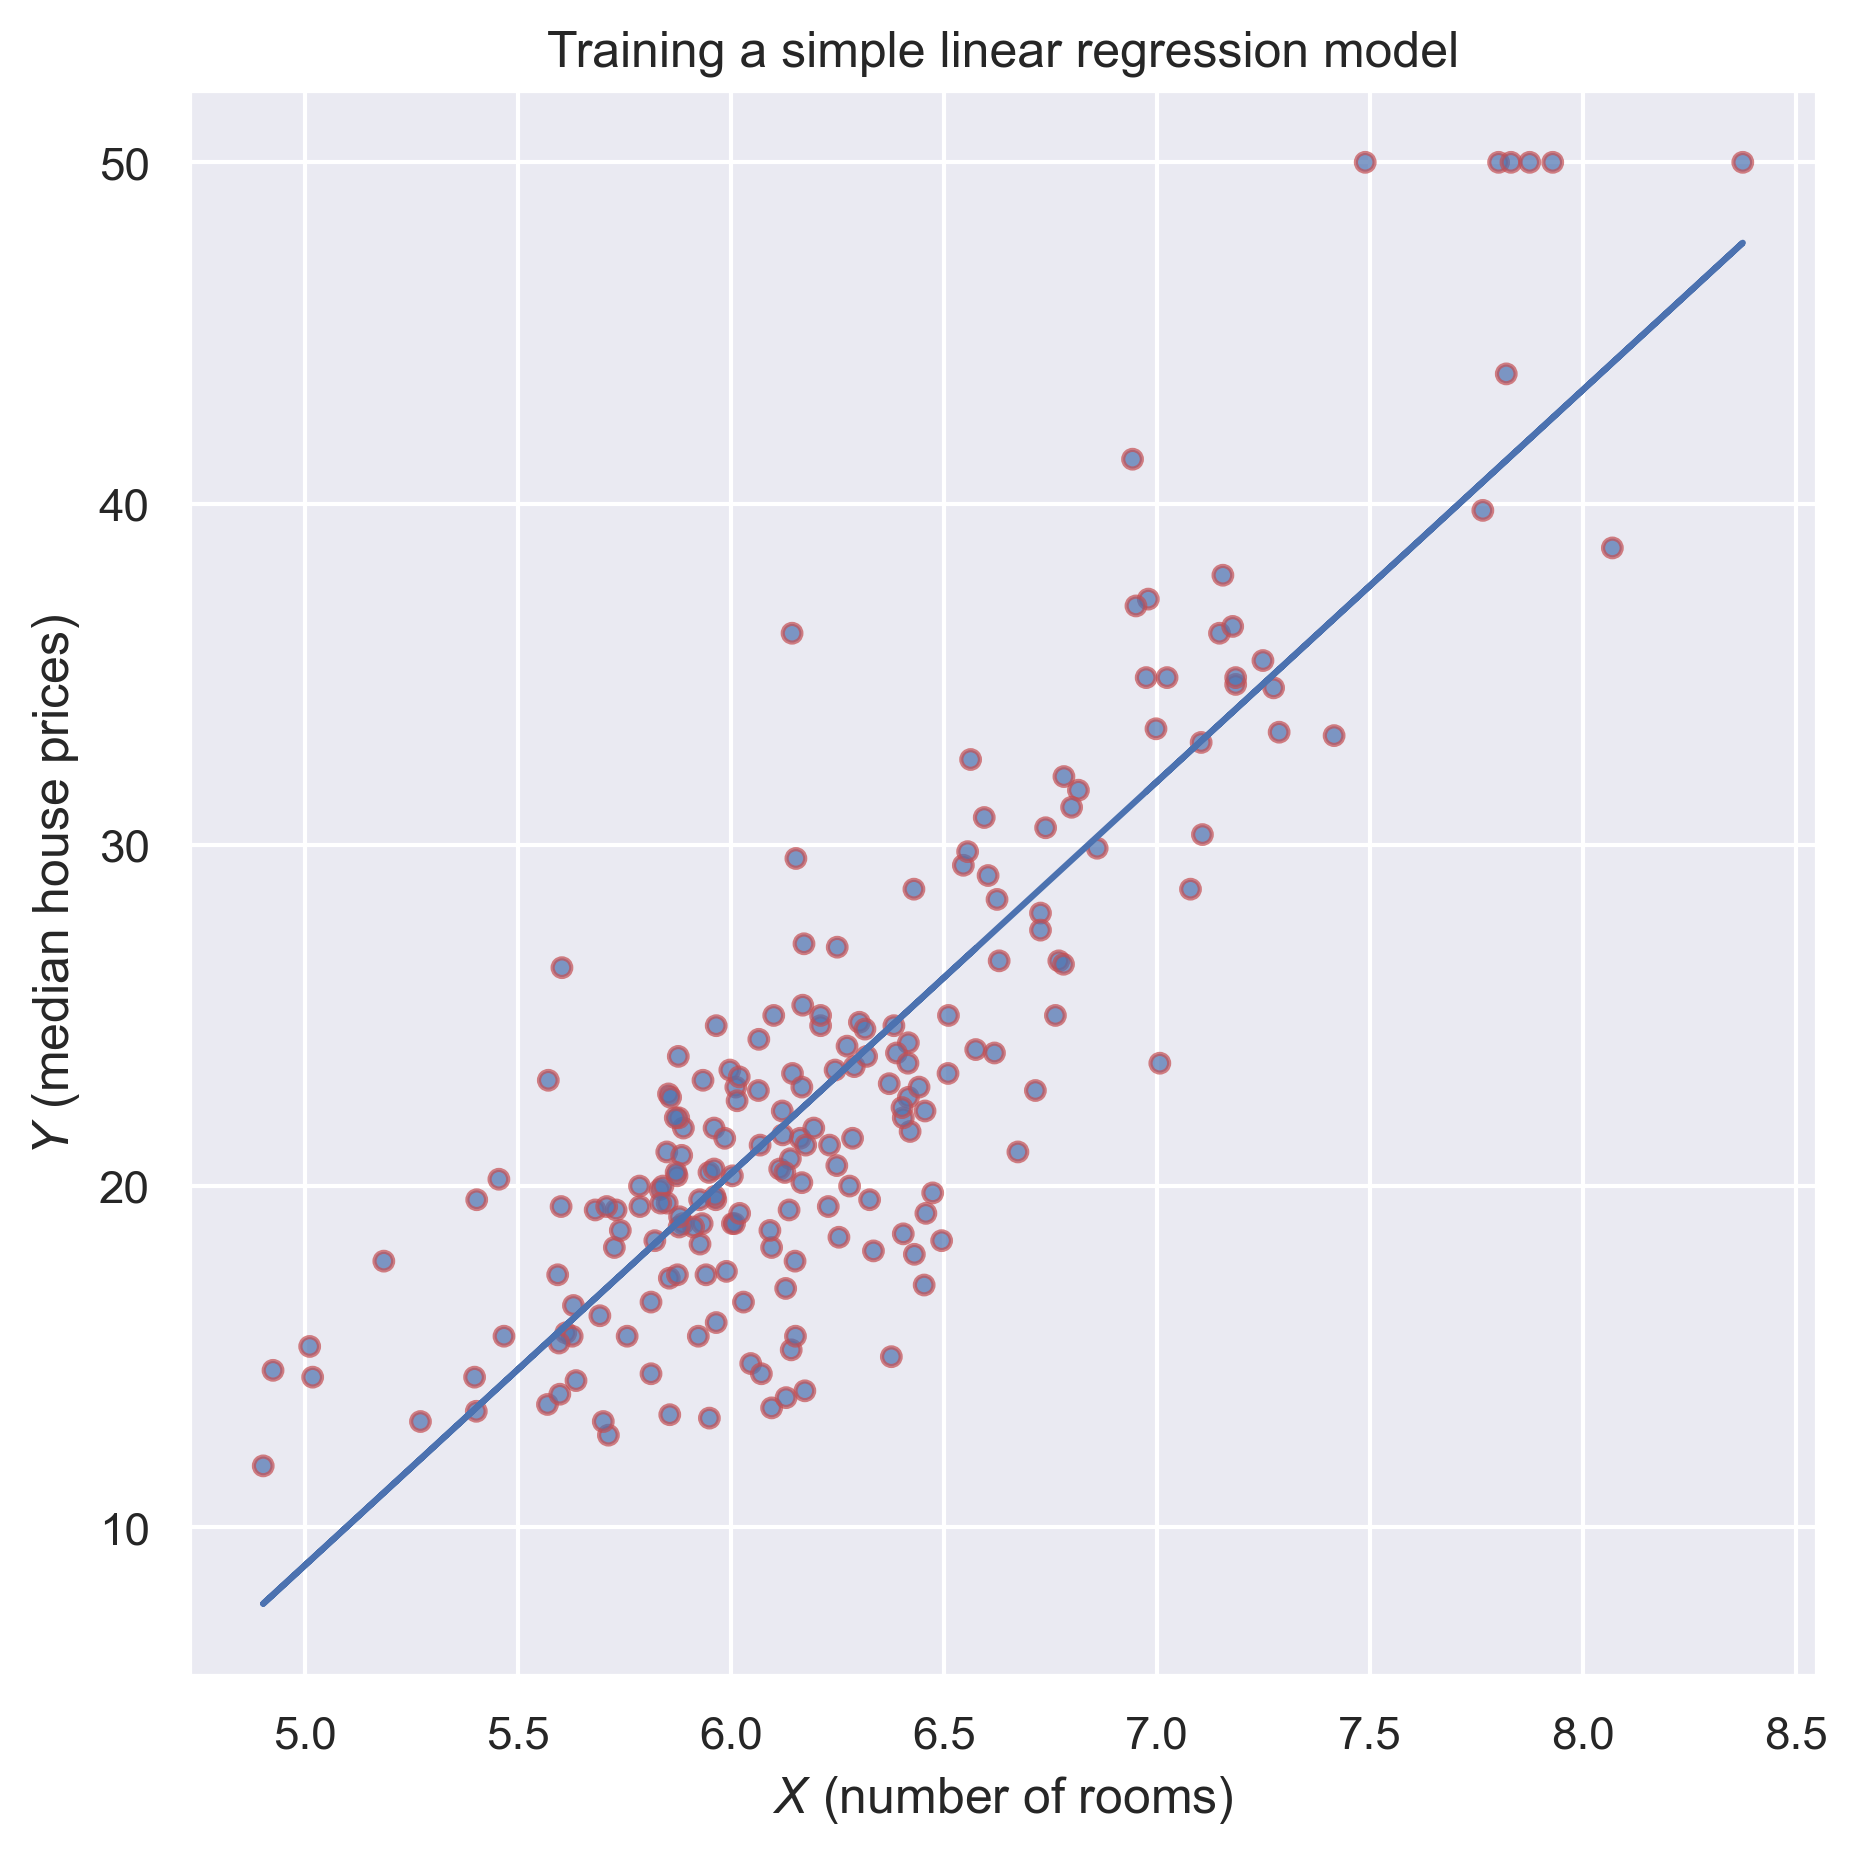

In [129]:
fig,ax = plt.subplots(figsize=(7,7),dpi=300)

# plot training data
scales = 20*np.ones(len(train_Y))
ax.scatter(train_X,train_Y,color='b',s=scales,alpha=0.7,edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')
plt.title('Training a simple linear regression model')

# plot the regression line
train_Yhat = lr.predict(train_X)
plt.plot(train_X,train_Yhat)

Now that we have obtained the model parameters, we can use the model to predict for unseen data:

In [130]:
yhat_test = lr.predict(test_X)

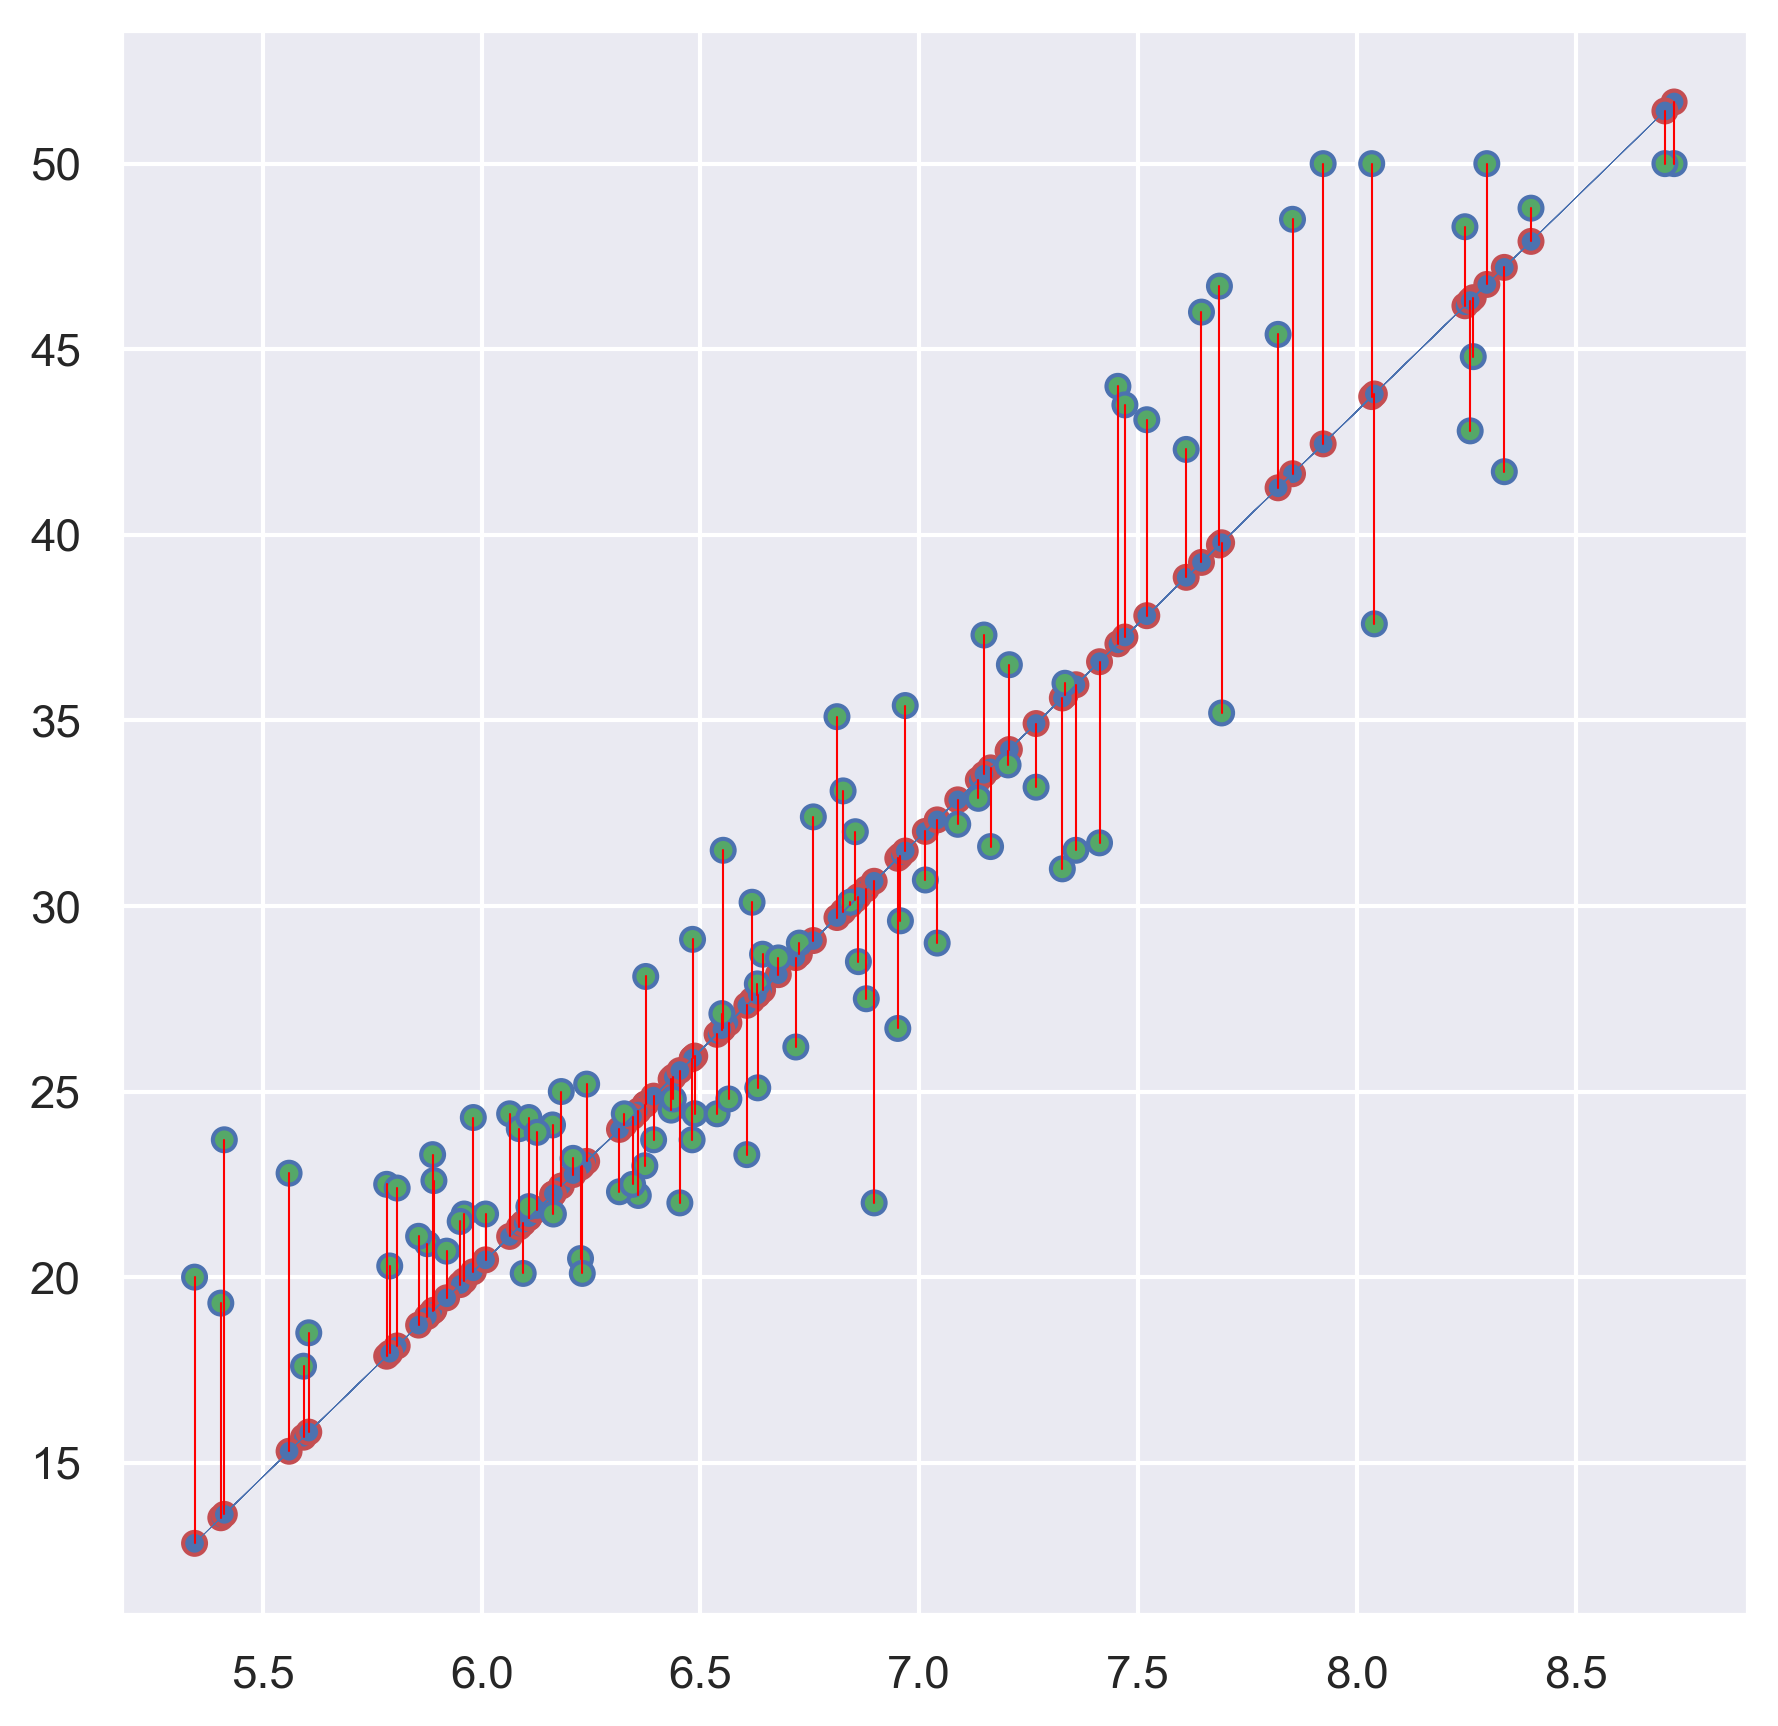

In [133]:
fig,ax = plt.subplots(figsize=(7,7),dpi=300)

# plot the predicted points along the prediction line
scales = 30*np.ones(len(test_X))
ax.scatter(test_X,yhat_test,s=scales,color='b',edgecolor='r')
ax.plot(test_X,yhat_test,color='b',linewidth=.2)

# plot the true values
scales = 30*np.ones(len(test_X))
ax.scatter(test_X,test_Y,s=scales,color='g',edgecolor='b')

# plot the residual line
tmp = np.reshape(test_X,[1,len(test_X)])[0]
tmp_x = []
tmp_y = []
for i in range(len(test_X)):
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,yhat_test[i])
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,test_Y[i])
    ax.plot(tmp_x,tmp_y,color='red',linewidth=0.5)
    tmp_x = []
    tmp_y = []

In [134]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
## <span style="color:#0b486b">3. Distances</span>

`Distance` is a numerical description of how far apart objects are. It is a concrete way of describing what it means for elements of some space to be close or far away from each other, for example the distance between two vectors in an 2-dimensional space.

Now that you have know how to represent an n-dimensional vector in Python with NumPy arrays, we will write a function as a metric to measure the distance between two vectors. There are multiple ways to measure the distance between two vectors. We will discuss Euclidean distance and cosine distance.

<a id = "euclidean"></a>


### <span style="color:#0b486b">3.1 Euclidean Distance</span>

Euclidean distance comes from Geometry. If we assume $\mathbf{x}_{1}=\left[x_{11},x_{12},\ldots,x_{1n}\right]$ and $\mathbf{x}_{2}=\left[x_{21},x_{22},\ldots,x_{2n}\right]$, then the Euclidean distance between $\mathbf{x}_{1}$ and $\mathbf{x}_{2}$ is defined as:

$$d\left(\mathbf{x}_{1},\mathbf{x}_{2}\right)=\sqrt{\left(x_{11}-x_{21}\right)^{2}+\left(x_{12}-x_{22}\right)^{2}+\ldots+\left(x_{1n}-x_{2n}\right)^{2}}
$$

We can use array operators for this task.

In [136]:
x1 = np.array([2, 5, 4, 6, 8])
x2 = np.array([3, 5, 6, 8, 6])

print (x1 - x2)
print ((x1 - x2) ** 2)
print (np.sqrt(np.sum((x1 - x2) ** 2)))

[-1  0 -2 -2  2]
[1 0 4 4 4]
3.605551275463989


In [137]:
import numpy as np

In [138]:
def euclidean_distance1(x1, x2):
    d = x1 - x2
    d = d ** 2
    return np.sqrt(d.sum())

In [140]:
x1 = np.array([-1, 2, 0, 5])
x2 = np.array([4, 2, 1, 0])

print (euclidean_distance1(x1, x2))

7.14142842854285


Since two vectors passed to the function should be the same size, it is better to perform a sanity check before applying the subtraction. Otherwise it will raise an error. We can do this by using `if - elif` statement or as a better practice by using `try - except`.

In [147]:
import sys

def euclidean_distance2(x1, x2):
    if x1.shape[0] != x2.shape[0]:
        sys.exit('x1 and x2 are not the same size')
    else:
        d = x1 - x2
        d = d ** 2
        return np.sqrt(d.sum())

In [148]:
# fix this cell

x1 = np.array([-1, 2, 0, 5])
x2 = np.array([4, 2, 1, 0])
euclidean_distance2(x1, x2)

7.14142842854285

In [150]:
def euclidean_distance3(x1, x2):
    try:
        d = x1 - x2
        d = np.power(d, 2)
        return np.sqrt(d.sum())
    except ValueError as e:
        print ("Vectors passed to the function are not the same size")
        # you can return a default value
        return None

In [151]:
# fix this cell

x1 = np.array([-1, 2, 0, 5, 9])
x2 = np.array([4, 2, 1, 2])
a = euclidean_distance3(x1, x2)

Vectors passed to the function are not the same size


In [153]:
def euclidean_distance4(x1, x2):
    try:
        d = np.array(x1) - np.array(x2)
        d = np.power(d, 2)
        return np.sqrt(d.sum())
    except ValueError as e:
        print ("Vectors passed to the function are not the same size")
        # you can return a default value
        return None

<a id = "cosine"></a>

### <span style="color:#0b486b">3.2 cosine similarity and distance</span>

Cosine similarity is a measure of similarity between two vectors based on the angle between them. Cosine similarity is widely used in information retrieval and text mining as a measure of similarity between documents and is defined as:

$$S_{c}\left(\mathbf{x}_{1},\mathbf{x_{2}}\right)=\frac{\mathbf{x}_{1}.\mathbf{x_{2}}}{\parallel\mathbf{x}_{1}\parallel^{2}+\parallel\mathbf{x}_{2}\parallel^{2}-\mathbf{x}_{1}.\mathbf{x_{2}}}$$


Cosine similarity is particularly used in positive space where the outcome is bounded in [0, 1]. The cosine distance is defined as the complement to cosine similarity in positive space that is $D_{c}\left(x_{1},x_{2}\right)=1-S_{c}\left(x_1,x_2\right)$ where $D_c$ is the cosine distance and $S_c$ is the cosine similarity.

In [154]:
x1 = np.array([1,2,3])
x2 = np.array([3,4,6])

x1 * x1

array([1, 4, 9])

In [156]:
def cosine_distance(x1, x2):
    try:
        num = (x1*x2).sum()
        denom = (x1*x1).sum() + (x2*x2).sum() - (x1*x2).sum()
        num += 0.0    # or use np.astype(float) to make sure of float division
        return 1 - num/denom
    except ValueError as e:
        print ("Vectors passed to the function are not the same size")
        return None
    

In [157]:
x1 = np.array([2, 0, 5, 9])
x2 = np.array([4, 2, 1, 0])
cosine_distance(x1, x2)

0.8898305084745762

<a id = "t2d"></a>

### <span style="color:#0b486b">3.3 Term-by-Document matrix</span>

A term-by-document matrix is a mathematical representation of a text corpus. It describes the frequency of terms that occur in the document collection. Each row corresponds to a document and each column correspond to a term. Thus the value that appears in row $j$ and column $i$ represents the frequency of appearing term $i$ in document $j$.

We will represent two datasets with term-by-document matrix:

* a collection of 100 Twitter messages about Geelong
* a collection of 6 news articles (5 about Apple and 1 about politics)

The data is already collected and stores in text files. Thus you will need to:

* read the text files
    * using file object
* perform pre-processing
    * using string methods
    * using re package
* construct the term-by-document matrix
    * using numpy arrays and operations
    

### 3.3.1 Twitter dataset
First read the data:

In [160]:
import os

# get current working directory
cwd = os.getcwd()   

# join the subdirectory of the data and data file name
file_path = os.path.join(cwd, "data/tweets.txt")

# read the contents of the file and store it in a list
with open(file_path,encoding="utf-8") as fp:
    tweets = fp.readlines()    
for tweet in tweets:
    print (tweet)

GEELONG and beyond is the perfect FB page to keep you up to date on that area. Pop over and give them a LIKE too:

https://t.co/hKvjPDsZKT

CPSU members hungry for action at geelong trades hall http://t.co/gPAveTuSaV

Club member Sharnee McIntosh and PT Anna Vines featured in this week's issue of the Geelong News.… https://t.co/ddIuHsOwJv

RONE Melbourne, Geelong, Australia. http://t.co/zrXyw7pvZu

RT @CPSUnion: Geelong to be hit by fed PS strike today. #cpsusafeguard http://t.co/bgWEDw9zCa http://t.co/FBMh8rKaKQ

RT @Tradeshallglg: CPSU members meetingin geelong.  Standing room only http://t.co/SHUrGhixtJ

RT @geelongaddy: Shire to test water over pool cost: http://t.co/mgYg1O4j2b http://t.co/bAsid1QEXl

Hey pool champions of @surfcoastnotes did you not know when you ran for election? Disgraceful! #surfcoastpool http://t.co/UohzWEsWaP

Geelong Social is out! http://t.co/vsHhsHezgR Stories via @MarkBeyerle @M_Wills_Avenue @Himekami64

Disgraceful work @surfcoastnotes stop this, make a 

Mostly when dealing with data, we have to perform some sort of data pre-processing. Data collection is often loosely controlled, resulting in out of the range values, missing values, and etc. Thus quality of the data is first and formost before running an analysis. This step is specific to the nature of the data. For example for text data it may consist of cleaning, normalization, tokenization, and etc. 

In this case, our pre-processing consists of:

* converting all the words into lower case to remove the effect of the letter case
* replacing the URLs with a simple string such as 'url'. From the previous cell, you should be able to see that many of the tweets contain a URL. Since we are not using them now, we can remove them or replace them.
* Removing the punctuations

In [195]:
import numpy as np
import re
import string
from collections import Counter

def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
    """
    
    doc = doc.lower()
    # gettign rid of non ascii codes
    doc = doc.decode('ascii', 'ignore')
    
    # repalcing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|_|,|=|;|>|<|\."
    doc = re.sub(punctuation, ' ', doc)
    
    return doc.split()

In [196]:
#改不出来

In [197]:
print (r['text'])
pre_process(r['text'])

NameError: name 'r' is not defined

**Exercise:**

Use the function provided to pre-process one of the tweets.

In [183]:
# code here

In [198]:
def termdoc(docs):
    """
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    vocab = set()   
    termdoc_sparse = []

    for doc in docs:
        # pre-process the doc
        doc_tokens = pre_process(doc)
        # computes the frequencies for doc
        doc_sparse = Counter(doc_tokens)    

        termdoc_sparse.append(doc_sparse)

        # update the vocab
        vocab.update(doc_sparse.iterkeys())  

    vocab = list(vocab)
    vocab.sort()

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.iteritems():
            termdoc_dense[j, vocab.index(term)] = freq
            
    return termdoc_dense, vocab

In [ ]:
#改不出来

In [199]:
tweets_termdoc, tweets_vocab = termdoc(tweets)

AttributeError: 'Counter' object has no attribute 'iterkeys'

Lets look at the vocabulary:

Lets look at one of tweets:

In [200]:
j = 0
print (tweets[j])
print (tweets_termdoc[j])

GEELONG and beyond is the perfect FB page to keep you up to date on that area. Pop over and give them a LIKE too:



NameError: name 'tweets_termdoc' is not defined

In [190]:
tweets_vocab.index('beyond')


NameError: name 'tweets_vocab' is not defined

In [ ]:
tweets_termdoc[j][127]

So baiscally, now each tweet is represented by a vector of size `len(tweets_vocab)`.

### 3.3.2 News dataset
Similar to previous sections, the data is stored in text files names as'news1.txt', ..., 'news5.txt'. All we have to do is read the files, construct the corpus and send it to `termdoc()` function.

In [202]:
n_docs = 6
cwd = os.getcwd()   
news = []
#路径问题
for j in range(1, n_docs+1):
    filename = "news{}.txt".format(j)
    file_path = os.path.join(cwd, "data/{}".format(filename))
    with open(file_path) as fp:
        news.append(fp.read())

news_termdoc, news_vocab = termdoc(news)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\123\\Desktop\\node\\science data\\data/news1.txt'

So now each news article is represented with a large vector of size `len(news_vocab)`. We can do many things with this representation. For example measuring the distance between two documents. The first 5 news articles are tech news and about Apple, but the 6th one is about politics. We expect that tech news be more similar to each other rather than to the politics news. In other words the distance between two articles from tech news should be less than the distance between a tech news article and a news article about politics. This is shown below:

In [204]:
print (cosine_distance(news_termdoc[1], news_termdoc[2]) )  # both aout Apple
print (cosine_distance(news_termdoc[1], news_termdoc[4]))   # one from tech world, the other from politics

NameError: name 'news_termdoc' is not defined

---
### <span style="color:#0b486b">4. k-Nearest Neighbours Classification</span> 

kNN is a non-parametric classification technique which is extensively used in practice. Its input consists of the `k` closest training examples and the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its `k` nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

**Please note that kNN is different from K-means.** K-means is a clustering algorithm that tries to partition a set of points into K sets (clusters) such that the points in each cluster be close to each other. It is unsupervised because the points have no external classification. kNN is a classification algorithm that in order to determine the classification of a point, combines the class of the k nearest points. It is supervised because you are trying to classify a point based on the known label of other points.

<a id = "knn"></a>

### <span style="color:#0b486b">4.1 kNN in Python</span> 

To be able to illustrate how we perform kNN classification in Python, we need some data first. Therefore we synthesize some data from 3 classes. We assume the data in each class comes from a multivariate random distribution.

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

Text(0, 0.5, '$x_2$')

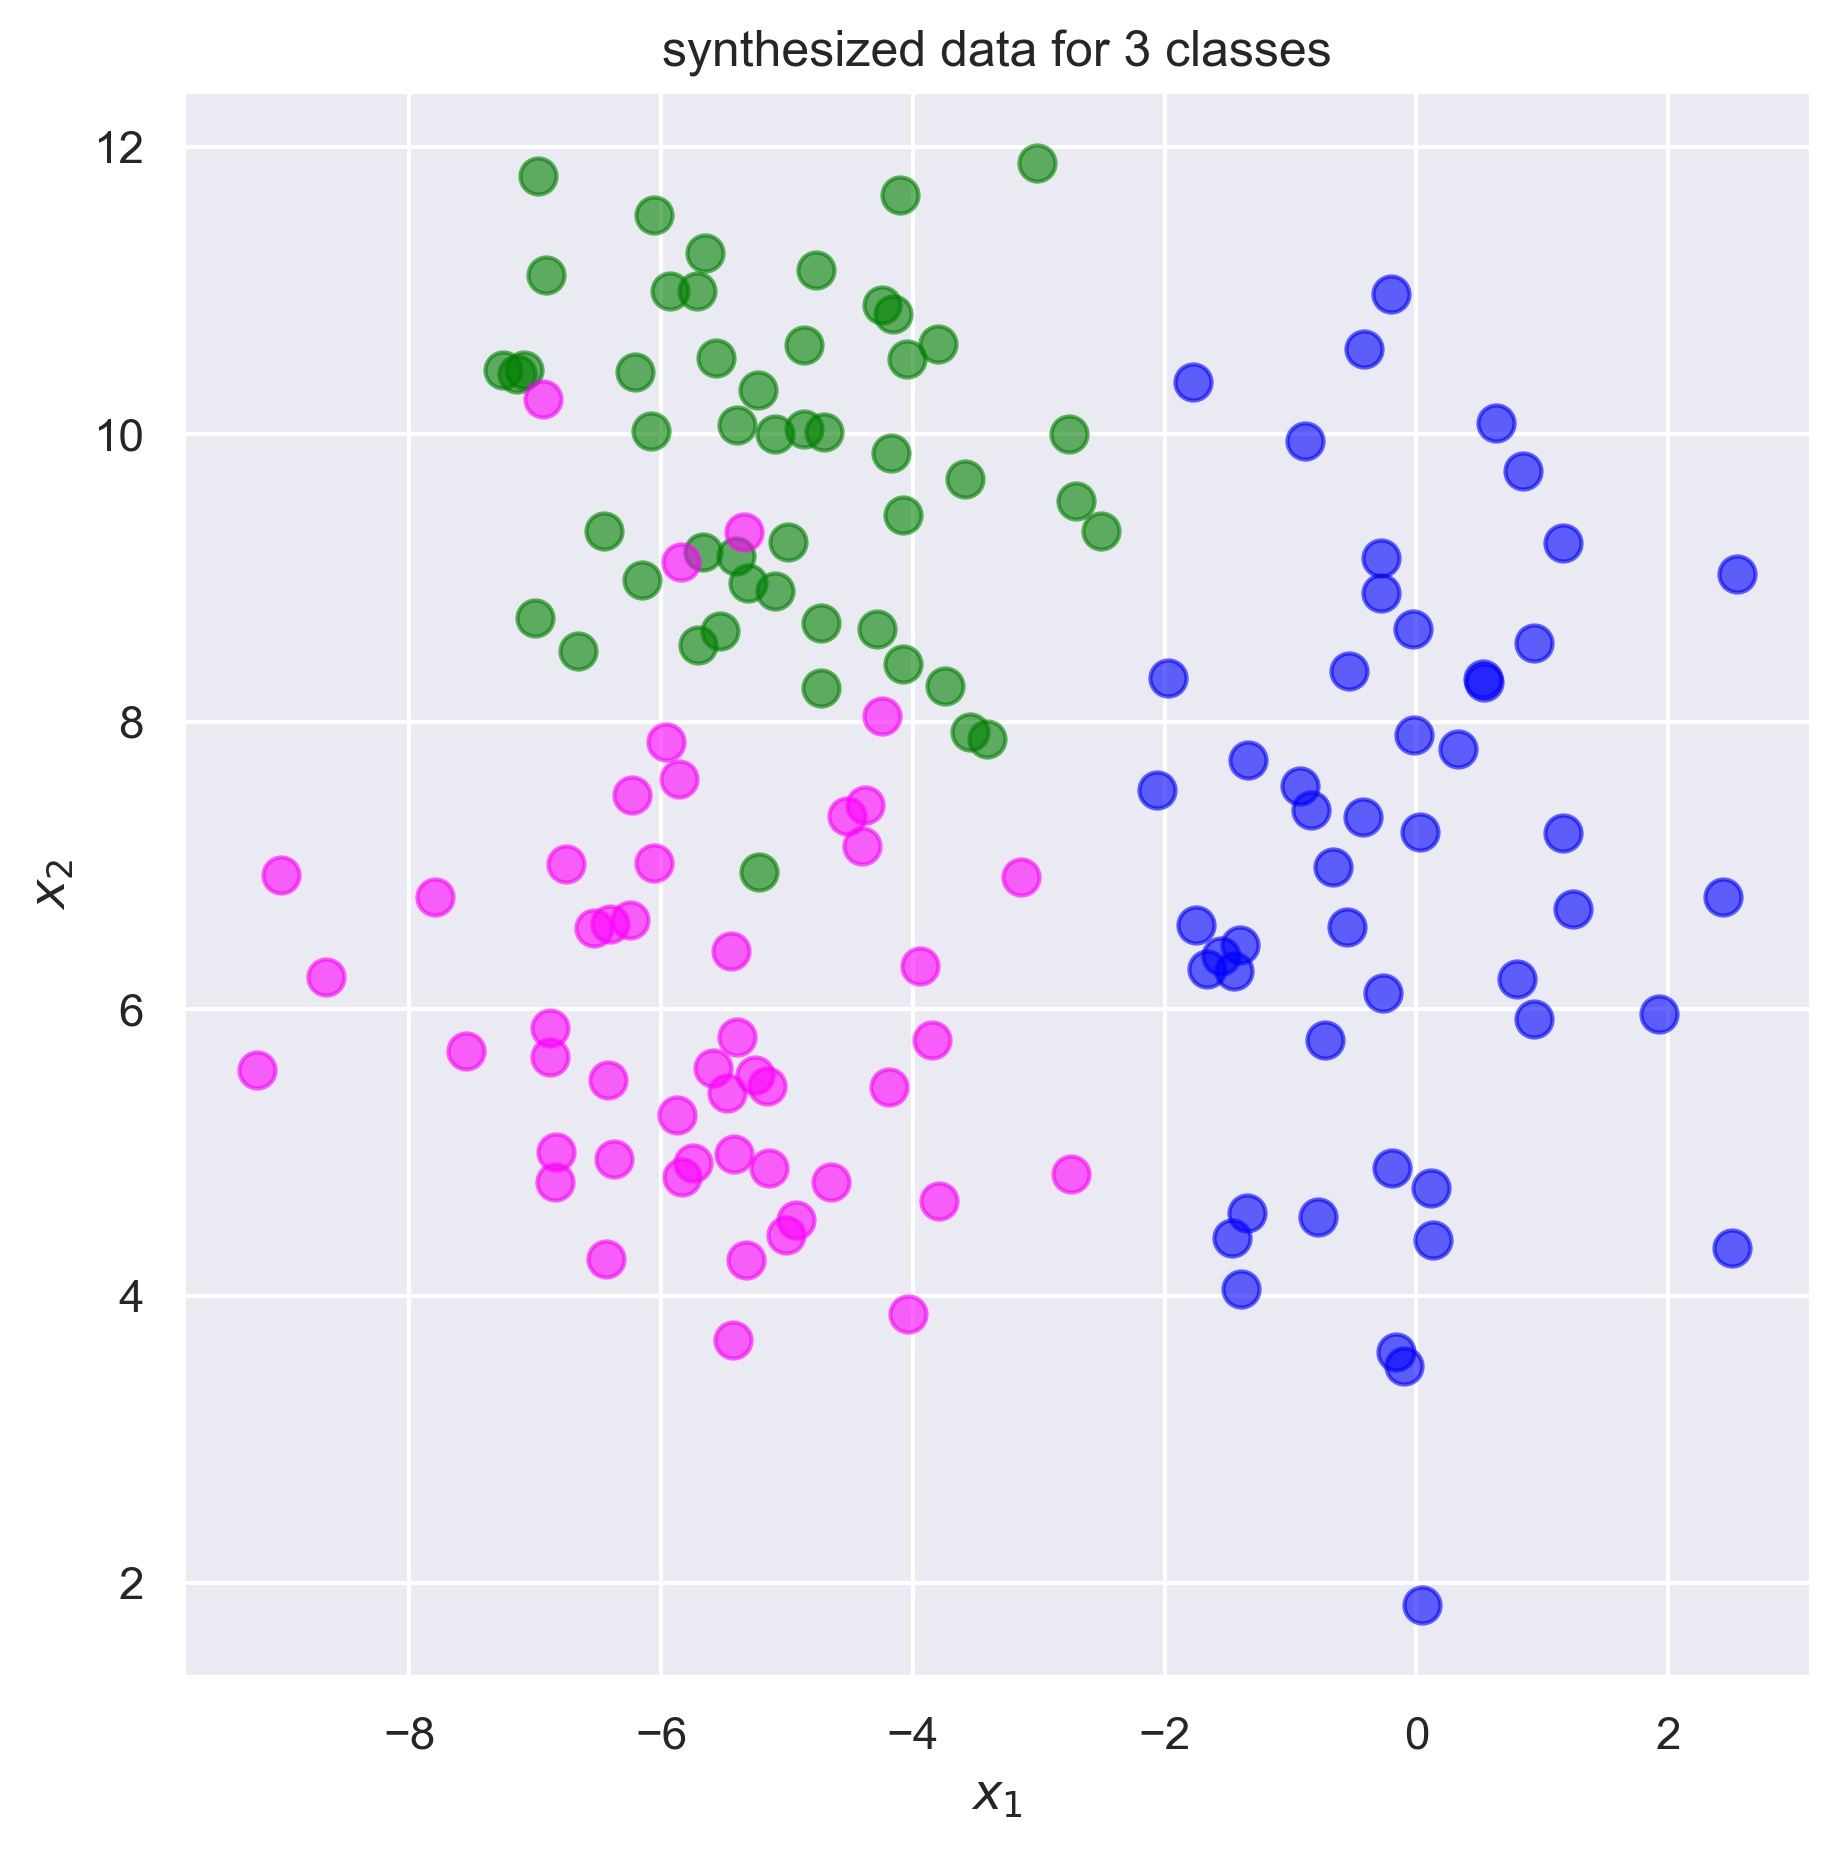

In [206]:
np.random.seed(100)
n_per_class = 50
colors = ['green', 'blue', 'magenta']

mean1 = [-5, 10]
cov1 = [[1.5, 0], [0, 1.5]]
mean2 = [0, 7]
cov2 = [[1.5, 0], [0, 3]]
mean3 = [-6, 6]
cov3 = [[2, 0], [0, 1.5]]

means = [mean1, mean2, mean3]
covs = [cov1, cov2, cov3]

x11, x12 = np.random.multivariate_normal(means[0], covs[0], n_per_class).T
x21, x22 = np.random.multivariate_normal(means[1], covs[1], n_per_class).T
x31, x32 = np.random.multivariate_normal(means[2], covs[2], n_per_class).T

scale = 75
alpha = 0.6

fig, ax  = plt.subplots(figsize=(7, 7), dpi=300)
ax.scatter(x11, x12, alpha=alpha, color=colors[0], s=scale)
ax.scatter(x21, x22, alpha=alpha, color=colors[1], s=scale)
ax.scatter(x31, x32, alpha=alpha, color=colors[2], s=scale)

ax.set_title("synthesized data for 3 classes")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

Then we have to instantiate a kNN classifier from sklearn.

In [207]:
from sklearn import neighbors

weights='uniform'
k = 15
knn = neighbors.KNeighborsClassifier(k,weights=weights)

We need to pass one array as training features and on array as training labels to the `knn` object. Therefore we have to put all the attributes together (also class labels).

In [209]:
x1 = np.r_[x11, x21, x31]
x2 = np.r_[x12, x22, x32]
X_train = np.c_[x1, x2]

print (x1)

[-7.14301629 -3.58782531 -3.7981324  -4.72911133 -5.23208405 -5.5609662
 -5.71475504 -4.17608864 -5.65068292 -5.53660436 -3.01716051 -5.30848768
 -4.77401168 -4.10471108 -5.39955839 -4.72761722 -5.92633861 -4.08089663
 -3.54301623 -6.66124278 -5.66679907 -4.99104153 -3.40814021 -6.204304
 -6.976222   -6.45501846 -6.15131672 -4.86667003 -6.05600852 -5.09750347
 -6.07997806 -4.70870102 -7.00310624 -4.24918377 -3.74228323 -7.25498593
 -5.40634234 -2.50812482 -4.08088613 -4.28894578 -4.15477727 -6.91879252
 -4.04614126 -4.86665959 -5.70891396 -7.08935597 -2.70167632 -2.75634568
 -5.09310935 -5.22659508 -1.39162984  0.04080517 -0.55135128  0.02720639
 -0.92151541  0.11652155 -1.45252729 -1.55667895  0.84922665 -0.16509722
  2.50670244 -1.34375576 -1.75024235 -0.02375709  0.93043025 -1.46220573
  1.16629469 -0.19260971  0.13213054  0.52624401 -0.78476743 -0.53658635
 -0.42045208  0.93470526 -0.42677329 -0.20233955  0.33066549 -1.40569064
 -0.88445045 -0.28110069 -0.66527897 -1.97115203 -1.77

In [210]:
Y_train = np.r_[0*np.ones(n_per_class), 1*np.ones(n_per_class), 2*np.ones(n_per_class)]

Now we can fit the model

In [211]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

Now we will see how kNN classifies a point.

In [212]:
k = 1
knn = neighbors.KNeighborsClassifier(k)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [213]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

ValueError: Expected 2D array, got 1D array instead:
array=[-7 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

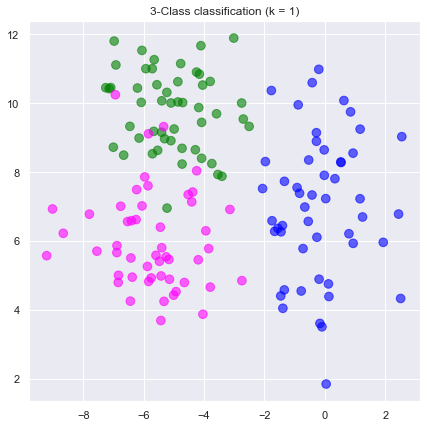

In [214]:
fig,ax = plt.subplots(figsize=(7, 7))

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.title("3-Class classification (k = {})".format(k))

X_test = [-7, 10]

Y_pred = knn.predict(X_test)
ax.scatter(X_test[0], X_test[1], marker="x", s=scale, lw=2, c='k')

ax.set_title("3-Class classification (k = {})\n Red point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]))

<a id = "db"></a>

### <span style="color:#0b486b">4.2 Decision Boundry</span> 

kNN effectively partitions the feature space into different sets and assigns the same class label to points belonging to the same partition. This partitioning changes as we change k. We illustrate this below. As you see bigger values of k, partition the space more smoothly.

In [215]:
from matplotlib.colors import ListedColormap

Text(0.5, 1.0, '3-Class classification (k = 15)')

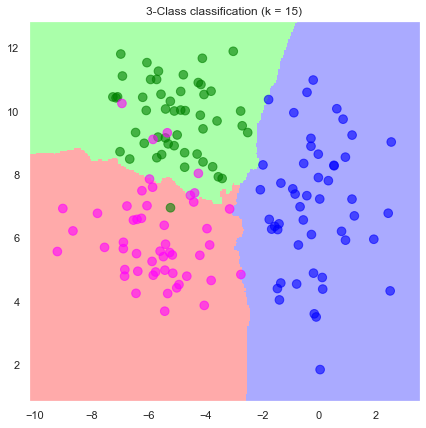

In [216]:
k = 15
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

# step size in the mesh
h = 0.05

# Create colour maps
cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['green', 'blue', 'magenta'])

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Now we will investigate the effect of `'k'` on decision boundaries. Lets train a classifier with `k=1` which means we only use the label of the closest point to predict the label of a test point.

Text(0.5, 1.0, '3-Class classification (k = 1)')

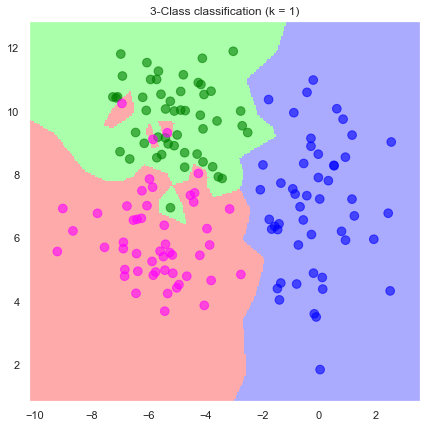

In [217]:
k = 1
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Text(0.5, 1.0, '3-Class classification (k = 2)')

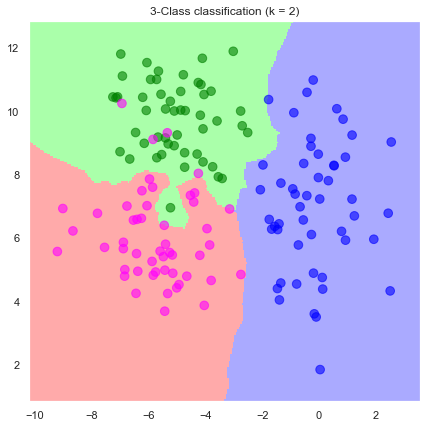

In [218]:
k = 2
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Text(0.5, 1.0, '3-Class classification (k = 3)')

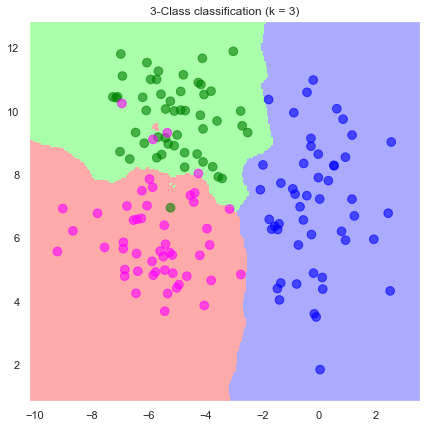

In [219]:
k = 3
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

Text(0.5, 1.0, '3-Class classification (k = 5)')

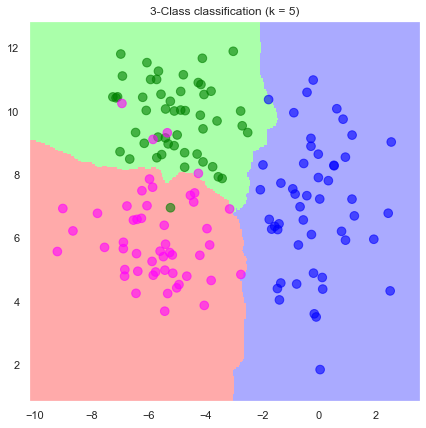

In [220]:
k = 5
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

#### 4.2.1 Prediction

Play with the `X_test` and `k` to see how the classifier behaves.

ValueError: Expected 2D array, got 1D array instead:
array=[-4  8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

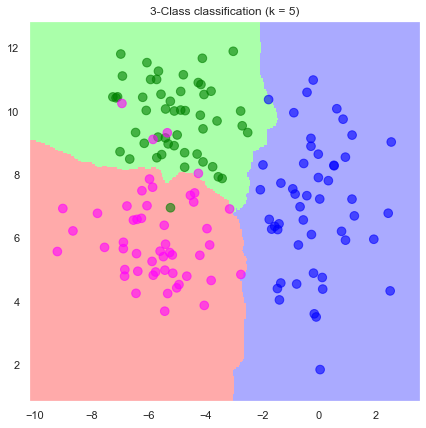

In [221]:
k = 5
knn = neighbors.KNeighborsClassifier(k, weights=weights)
knn.fit(X_train, Y_train)

Z = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

fig,ax = plt.subplots(figsize=(7, 7))
ax.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, alpha=alpha, s=scale)

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("3-Class classification (k = {})".format(k))

X_test = [-4, 8]
Y_pred = knn.predict(X_test)
ax.scatter(X_test[0], X_test[1], alpha=0.95, color='r', s=3*scale)

ax.set_title("3-Class classification (k = {})\n Red point is predicted as class {}".format(k, colors[Y_pred.astype(int)[0]]))

Now instead of predicting the class label for one point, we use our model to predict the labels of multiple points.

First we generate some test data from the first class. This way we know the true class labels. Then we can use the `kNN` classifier to predict labels for the test data and get the predicted class labels. A measure of  accuracy for the classifier can be defined by comparing the true and predicted labels.

In [222]:
n_test = 100
X1_test, X2_test = np.random.multivariate_normal(mean1, cov1, n_test).T
Y_true = 0 * np.ones(n_test)

In [223]:
X_test = np.c_[X1_test, X2_test]

In [224]:
Y_pred = knn.predict(X_test)

In [225]:
Y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

How many times the classifier predicts the labels correctly?

In [226]:
Y_pred == Y_true

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

 Accuracy:

In [227]:
(sum(Y_pred == Y_true) + 0.0) / n_test

0.96

**Exercise**: Repeat the previous experiment with a classifier which has been trained with a different `k`.

**Exercise**: Use kNN to implement a classifier on handwritten digits dataset introduced in prac7.

In [228]:
from sklearn import datasets

In [229]:
digits = datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [230]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [231]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [232]:
X = digits['data']
Y = digits['target']

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [238]:
from sklearn import neighbors

k = 15
knn = neighbors.KNeighborsClassifier(k)

In [239]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [240]:
Y_pred = knn.predict(X_test)

In [241]:
Y_pred == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [242]:
(sum(Y_pred == Y_test) + 0.0) / len(Y_test)

0.9814814814814815

In [243]:
mask = Y_pred != Y_test

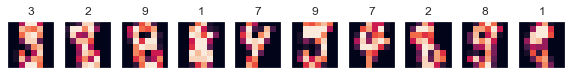

In [244]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 1))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[mask][i, :].reshape(8, 8))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("{}".format(Y_pred[mask][i]))

## <span style="color:#0b486b">5. Naive Bayes Classifier</span> 


Naive Bayes is one of the most practical classification machine learning algorithms. 

* fast
* good performance
* simple yet very effective
* robust to irrelative features

So why is it called naive?

Because it does not consider the dependency between features and assume all features are independent of each other which is not the case in reality. This is a naive assumption, hence the name.

The accuracy is very good although this naive assumption. A famous example of NB usage is spam filtering.

<a id = "nbc"></a>
### <span style="color:#0b486b">5.1 NBC by Example</span> 

We assume we have collected the below data for the past 5 days. Based on this data, can we predict if our subject will play in a setting like:

    outlook  = overcast
    temp     = hot
    humidity = normal
    windy    = no

<!-- <img src="nb_data.png" width="800"> -->
<img src="image/nb_data.png" width="800">
<br />

First we have to find a representation for our data. We can construct a dictionary to convert stings into numbers and then save them in a dataframe. 

    outlook: sunny=0, overcast=1, rainy=2
    temp: hot=0, mild=1, cool=2
    humidity: normal=0, high=1
    wind: no=0, yes=1
    play: np=0, yes=1

In [245]:
from __future__ import division

import numpy as np
import pandas as pd

In [246]:
data = {
    'outlook': [0, 1, 2, 0, 1],
    'temp'   : [0, 1, 2, 1, 0],
    'humid'  : [0, 0, 1, 0, 1],
    'wind'   : [0, 0, 1, 1, 0],
    'play'   : [1, 1, 0, 0, 0,]    
}

df = pd.DataFrame(data)

Now we use Bayes rule to construct a Naive Bayes classifier. We can write:

$$Pr\left(p|o,t,h,w\right)\propto Pr\left(p\right)Pr(o|p)Pr(t|p)Pr(h|p)Pr(w|p)$$

To calculate $Pr(p)$ we use marginal probablity.

In [247]:
def marginal_prob(df, col):
    ll = [(ss, (df[col] == ss).sum()) for ss in set(df[col])]
    total_count = [b for a,b in ll]
    total_count = sum(total_count)
    
    ll2 = [(a, b/total_count) for a, b in ll]
    return dict(ll2)

To calculate probability of a feature given the class (play) we use conditinoal probability.

In [248]:
def conditional_prob(df, f, c, val):
    df2 = df[df[c] == val][f]
    ll = [[ss, (df2 == ss).sum()] for ss in set(df2)]
    total_count = [b for a,b in ll]
    total_count = sum(total_count)
    
    ll2 = [(a, b/total_count) for a, b in ll]
    return dict(ll2)

Now we can use Bayes rule:

In [250]:
o = 1
t = 0
h = 0
w = 0

c = 0
p0 = marginal_prob(df, 'play')[c] * conditional_prob(df, 'outlook', 'play', c)[o] * conditional_prob(df, 'temp', 'play', c)[t] \
* conditional_prob(df, 'humid', 'play', c)[h] * conditional_prob(df, 'wind', 'play', c)[w]

c = 1
p1 = marginal_prob(df, 'play')[c] * conditional_prob(df, 'outlook', 'play', c)[o] * conditional_prob(df, 'temp', 'play', c)[t] \
* conditional_prob(df, 'humid', 'play', c)[h] * conditional_prob(df, 'wind', 'play', c)[w]

# normalizing
p_sum = p0 + p1
p0 /= p_sum
p1 /= p_sum

print ("probability of not playing: {}".format(p0))
print ("probability of playing    : {}".format(p1))

probability of not playing: 0.06896551724137928
probability of playing    : 0.9310344827586208


<a id = "nbc2"></a>
### <span style="color:#0b486b">5.2 NBC Exercise</span> 



Suppose we have documents below as our training set. 

    d1: Chinese Beijing Chinese , class = C
    d2: Chinese Chinese Shanghai, class = C
    d3: Chinese Macao           , class = C
    d4: Tokyo Japan Chinese     , class = J


Train a NB classifier and predict if `d5` belongs to class C or J.

    d5: Chinese Chinese Chinese Tokyo Japan, class = ?

In [ ]:
# Your code here...

---
## <span style="color:#0b486b">6. Confidence Interval</span> 

<a id = "popsample"></a>

### <span style="color:#0b486b">6.1 Population vs Sample</span> 

The main difference between population and sample comes down to how observations are assigned to dataset. A **population** includes all of the elements from the dataset. A **sample** consists of one or more observations from the population. In other words **population** is the entire collection of the desired measurable characteristic that we would have, if we could collect it. 

For example if suppose we want to find the average height of 2nd grade students in Australia. The population would be all the students who are studying in 2nd grade in Australia. But most probably we can not measure the height of all Australian 2nd grade students. It is not feasible. So what do we do? **We sample!**. We collect the height of some of Australian 2nd graders and based on that, we **estimate** the average height of the population (all of Australian 2nd grade students). The sample could be 2nd grade students of one class in one school, or multiple classes in multiple schools in one state, or  multiple schools in multiple states, or etc.

A measurable statistic of a population (such as mean) is called a **parameter**. But a measurable characteristic of a sample is called **statistic**.

----
<a id = "ci"></a> 

### <span style="color:#0b486b">6.2 Confidence Interval</span> 

As stated in previous section, population parameter is unknown. Confidence interval is a type of interval estimate of a population parameter calculated from sample statistics. It is an interval estimate combined with a probability.

For the aforementioned example, it means that without collecting the height of all Aussie 2nd graders, we can estimate the average height by collecting a sample and using the below formula:


$$Confidence\, Interval=\bar{X}\pm z\frac{s}{\sqrt{n}}$$

$s$ is the sample standard deviation, $n$ is the sample size, and $z$ is often read from a table.

    confidence level (%)     z
         
            70              1.04 
            75              1.15
            80              1.28 
            85              1.44 
            90              1.645
            92              1.75
            95              1.96
            96              2.05
            98              2.33
            99              2.58

Now lets use an example to clarify this concept.

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

%matplotlib inline
sns.set()

First we create a population. Please note that we do not use the population in our computations. We use samples from it.

In [252]:
mu, sigma = 10, 2
n_population = 10000
population = np.random.normal(mu, sigma, n_population)

Text(0.5, 1.0, 'population histogram, $\\mu=10$, $\\sigma=2$ ')

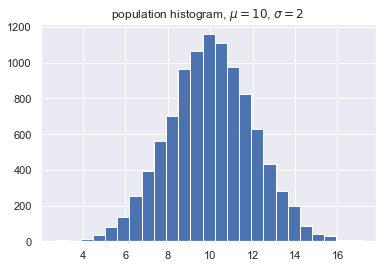

In [253]:
fig, ax = plt.subplots()
ax.hist(population, bins=25)
ax.set_title(r"population histogram, $\mu={}$, $\sigma={}$ ".format(mu, sigma))

Now we sample multiple times from this population.

In [254]:
n_trials = 1000
sample_size = 500
samples = np.zeros([n_trials, sample_size])
sample_std = np.zeros(n_trials)
sample_mean = np.zeros(n_trials)

for i in range(n_trials):
    samples[i] = np.random.choice(population, size=sample_size, replace=False)
    sample_mean[i] = samples[i].mean()
    sample_std[i] = samples[i].std()

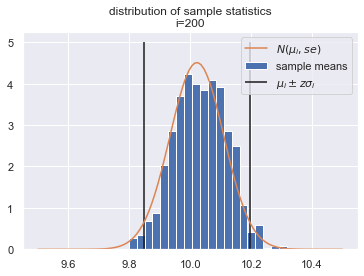

In [255]:
i = 200
se = sample_std[i] / np.sqrt(sample_size)
dist = ss.distributions.norm(sample_mean[i], se)
z = 1.96

x = np.linspace(9.5, 10.5, 100)
y = dist.pdf(x)

fig, ax = plt.subplots()
    
ax.hist(sample_mean, density=True, bins=20, label='sample means')
ax.plot(x, y, label="$N(\mu_{i},se)$")
ax.vlines(sample_mean[i] + z*se, 0, 5, label='$\mu_i \pm z\sigma_i$')
ax.vlines(sample_mean[i] - z*se, 0, 5)

ax.set_title("distribution of sample statistics\ni={}".format(i))
ax.legend()
